改めて新しいテキストでトピックモデルを作ってみる

In [1]:
import gensim
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


テキストを読み込む

ディレクトリ下のファイルを取得する  
https://qiita.com/amowwee/items/e63b3610ea750f7dba1b

In [3]:
import glob
import os

In [4]:
os.chdir("/Users/yamada/test/cancer_genome")

In [5]:
list_file_name=glob.glob("./text_2/*")

In [10]:
list_file_name[0]

'./text_2/2205692.txt'

list_file_nameから相対パスを抜く

In [8]:
list_file_name_not_path= [i.strip("./text_2/") for i in list_file_name]

In [9]:
list_file_name_not_path[0]

'0569'

In [11]:
len(list_file_name_not_path)

20312

In [44]:
list_text=[]
for i in list_file_name:
    #print(i)
    #print(len((open('{}'.format(i), 'r')).readlines()))
    list_text.append(list(((open('{}'.format(i), 'r')).readlines())[0].split()))

IndexError: list index out of range

In [45]:
#2580164が中身0だった...

In [46]:
list_text=[]
for i in list_file_name:
    if len((open('{}'.format(i), 'r')).readlines())!=1:
        continue
    else:
        list_text.append(list(((open('{}'.format(i), 'r')).readlines())[0].split()))

In [2]:
#list_text[0]

In [24]:
#list_text

In [35]:
len((open('./text_2/2205692.txt', 'r')).readlines())

1

In [47]:
#((open('./text_2/2205692.txt', 'r')).readlines())[0].split()

以下、トピックモデルを実行

In [26]:
#辞書を作成

In [50]:
dictionary = gensim.corpora.Dictionary(list_text)
corpus = [dictionary.doc2bow(text) for text in list_text]

In [28]:
#トピックモデルの学習

In [51]:
num_topics = 20
 
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary
)

In [52]:
dict(lda.show_topic(0,200))

{'T>G_CT': 0.16976546,
 'T>C_CT': 0.071820125,
 'T>G_TT': 0.06540997,
 'T>G_GT': 0.042402864,
 'T>G_AT': 0.03352567,
 'T>C_CC': 0.022325287,
 'C>A_TT': 0.021713885,
 'T>A_CT': 0.021446211,
 'C>T_AG': 0.021395952,
 'C>T_GG': 0.016764507,
 'T>A_TA': 0.016642395,
 'T>C_TT': 0.016051836,
 'C>T_TA': 0.0150918905,
 'T>C_CG': 0.015086327,
 'C>T_CG': 0.014733486,
 'C>T_TT': 0.014543821,
 'T>A_TT': 0.014398264,
 'T>A_AT': 0.013872215,
 'C>A_TA': 0.012646562,
 'C>A_GA': 0.010927721,
 'T>C_TC': 0.010785856,
 'T>G_CC': 0.010734833,
 'C>T_TG': 0.01055691,
 'C>T_TC': 0.010524673,
 'T>C_GT': 0.010431332,
 'C>A_AA': 0.0103414515,
 'T>C_AT': 0.010032449,
 'C>T_AA': 0.00990253,
 'T>C_AA': 0.009841131,
 'T>C_TA': 0.00868935,
 'C>G_TT': 0.008635731,
 'C>T_CA': 0.008056084,
 'C>T_CT': 0.007904197,
 'T>G_CG': 0.0076370602,
 'T>C_CA': 0.0073384736,
 'T>A_CC': 0.007153201,
 'C>A_CA': 0.007138724,
 'T>C_GC': 0.00711792,
 'C>A_GT': 0.0070564477,
 'C>T_AT': 0.0068928944,
 'C>A_CT': 0.0067916526,
 'T>G_TA': 0.006

In [53]:
dict_topic0_test=dict(lda.show_topic(0,200))

In [55]:
#dictのソートをしてみる
dict_topic0_test_sort=dict(sorted(dict_topic0_test.items()))

In [56]:
dict_topic0_test_sort

{'C>ACG_AC': 3.242976e-08,
 'C>A_AA': 0.0103414515,
 'C>A_AC': 0.0058700466,
 'C>A_AG': 0.0007044676,
 'C>A_AT': 0.00622052,
 'C>A_CA': 0.007138724,
 'C>A_CC': 0.0033512416,
 'C>A_CG': 0.000831847,
 'C>A_CT': 0.0067916526,
 'C>A_GA': 0.010927721,
 'C>A_GC': 0.003633312,
 'C>A_GG': 0.0007236253,
 'C>A_GT': 0.0070564477,
 'C>A_TA': 0.012646562,
 'C>A_TC': 0.0064263935,
 'C>A_TG': 0.0011322268,
 'C>A_TT': 0.021713885,
 'C>G_AA': 0.003092984,
 'C>G_AC': 0.0017911547,
 'C>G_AG': 0.0004212107,
 'C>G_AT': 0.0036592702,
 'C>G_CA': 0.0018492527,
 'C>G_CC': 0.001402566,
 'C>G_CG': 0.000349642,
 'C>G_CT': 0.00278269,
 'C>G_GA': 0.0013733106,
 'C>G_GC': 0.0014930347,
 'C>G_GG': 0.00019385322,
 'C>G_GT': 0.002010504,
 'C>G_TA': 0.0047076433,
 'C>G_TC': 0.0026467878,
 'C>G_TG': 0.00042514916,
 'C>G_TT': 0.008635731,
 'C>T_AA': 0.00990253,
 'C>T_AC': 0.0048946477,
 'C>T_AG': 0.021395952,
 'C>T_AT': 0.0068928944,
 'C>T_CA': 0.008056084,
 'C>T_CC': 0.0056123105,
 'C>T_CG': 0.014733486,
 'C>T_CT': 0.007

In [57]:
dict_topic1_test=dict(lda.show_topic(1,200))
#dictのソートをしてみる
dict_topic1_test_sort=dict(sorted(dict_topic0_test.items()))

In [58]:
dict_topic1_test_sort

{'C>ACG_AC': 3.242976e-08,
 'C>A_AA': 0.0103414515,
 'C>A_AC': 0.0058700466,
 'C>A_AG': 0.0007044676,
 'C>A_AT': 0.00622052,
 'C>A_CA': 0.007138724,
 'C>A_CC': 0.0033512416,
 'C>A_CG': 0.000831847,
 'C>A_CT': 0.0067916526,
 'C>A_GA': 0.010927721,
 'C>A_GC': 0.003633312,
 'C>A_GG': 0.0007236253,
 'C>A_GT': 0.0070564477,
 'C>A_TA': 0.012646562,
 'C>A_TC': 0.0064263935,
 'C>A_TG': 0.0011322268,
 'C>A_TT': 0.021713885,
 'C>G_AA': 0.003092984,
 'C>G_AC': 0.0017911547,
 'C>G_AG': 0.0004212107,
 'C>G_AT': 0.0036592702,
 'C>G_CA': 0.0018492527,
 'C>G_CC': 0.001402566,
 'C>G_CG': 0.000349642,
 'C>G_CT': 0.00278269,
 'C>G_GA': 0.0013733106,
 'C>G_GC': 0.0014930347,
 'C>G_GG': 0.00019385322,
 'C>G_GT': 0.002010504,
 'C>G_TA': 0.0047076433,
 'C>G_TC': 0.0026467878,
 'C>G_TG': 0.00042514916,
 'C>G_TT': 0.008635731,
 'C>T_AA': 0.00990253,
 'C>T_AC': 0.0048946477,
 'C>T_AG': 0.021395952,
 'C>T_AT': 0.0068928944,
 'C>T_CA': 0.008056084,
 'C>T_CC': 0.0056123105,
 'C>T_CG': 0.014733486,
 'C>T_CT': 0.007

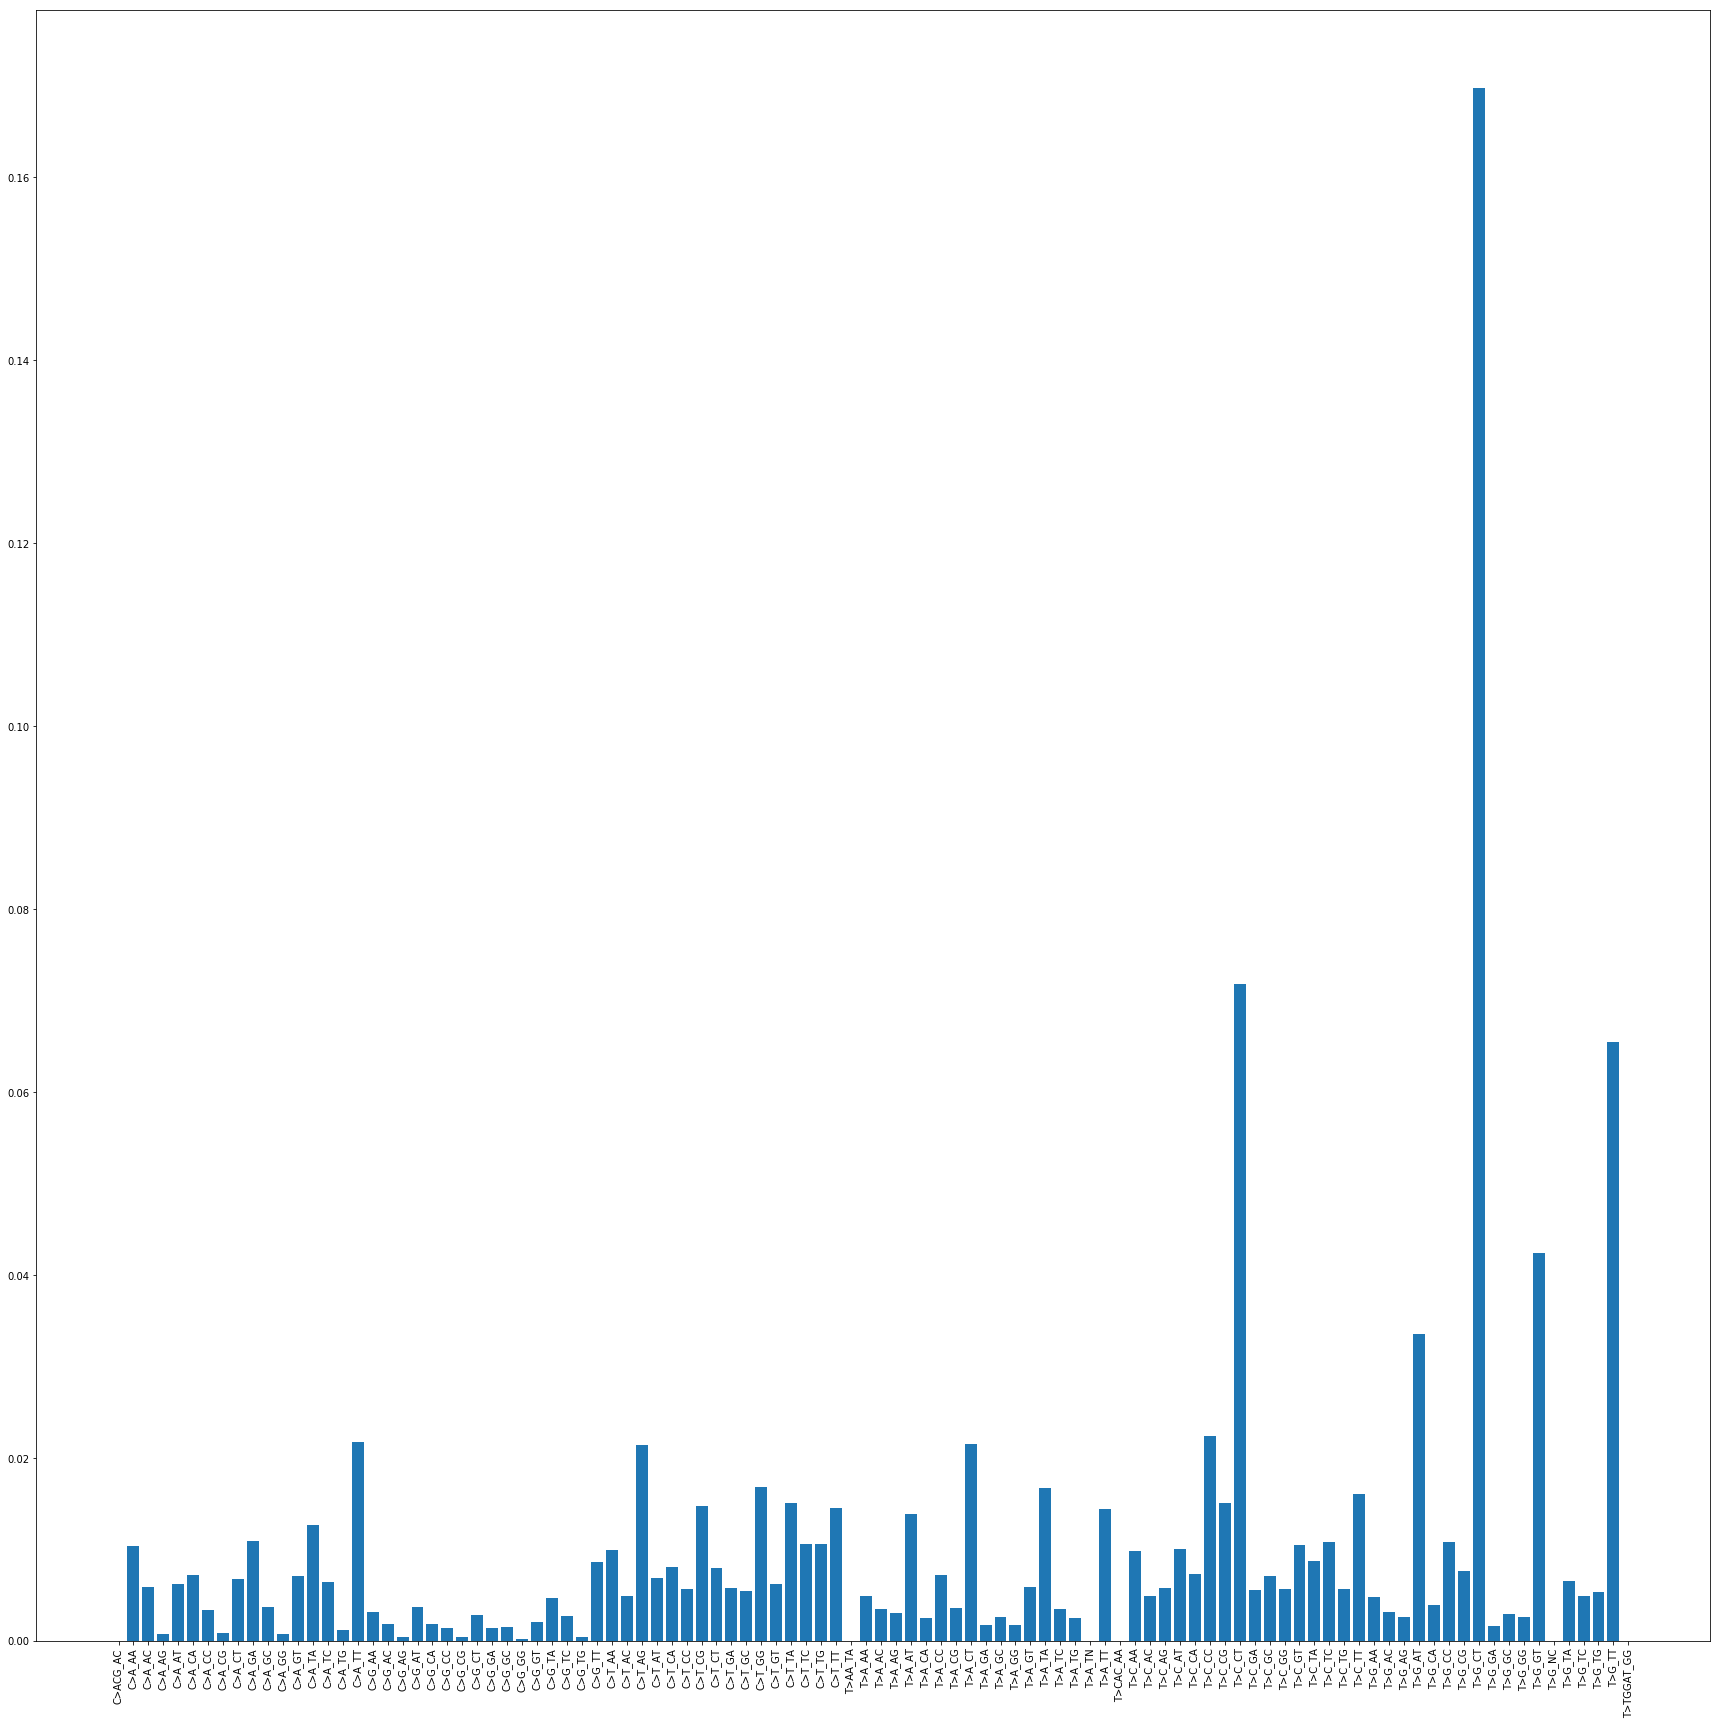

In [59]:
plt.figure(figsize=(30, 30))

plt.bar(range(len(dict_topic1_test_sort)), dict_topic1_test_sort.values(), align='center') 
plt.xticks(range(len(dict_topic1_test_sort)), list(dict_topic1_test_sort.keys()), rotation=90) 

plt.show() 

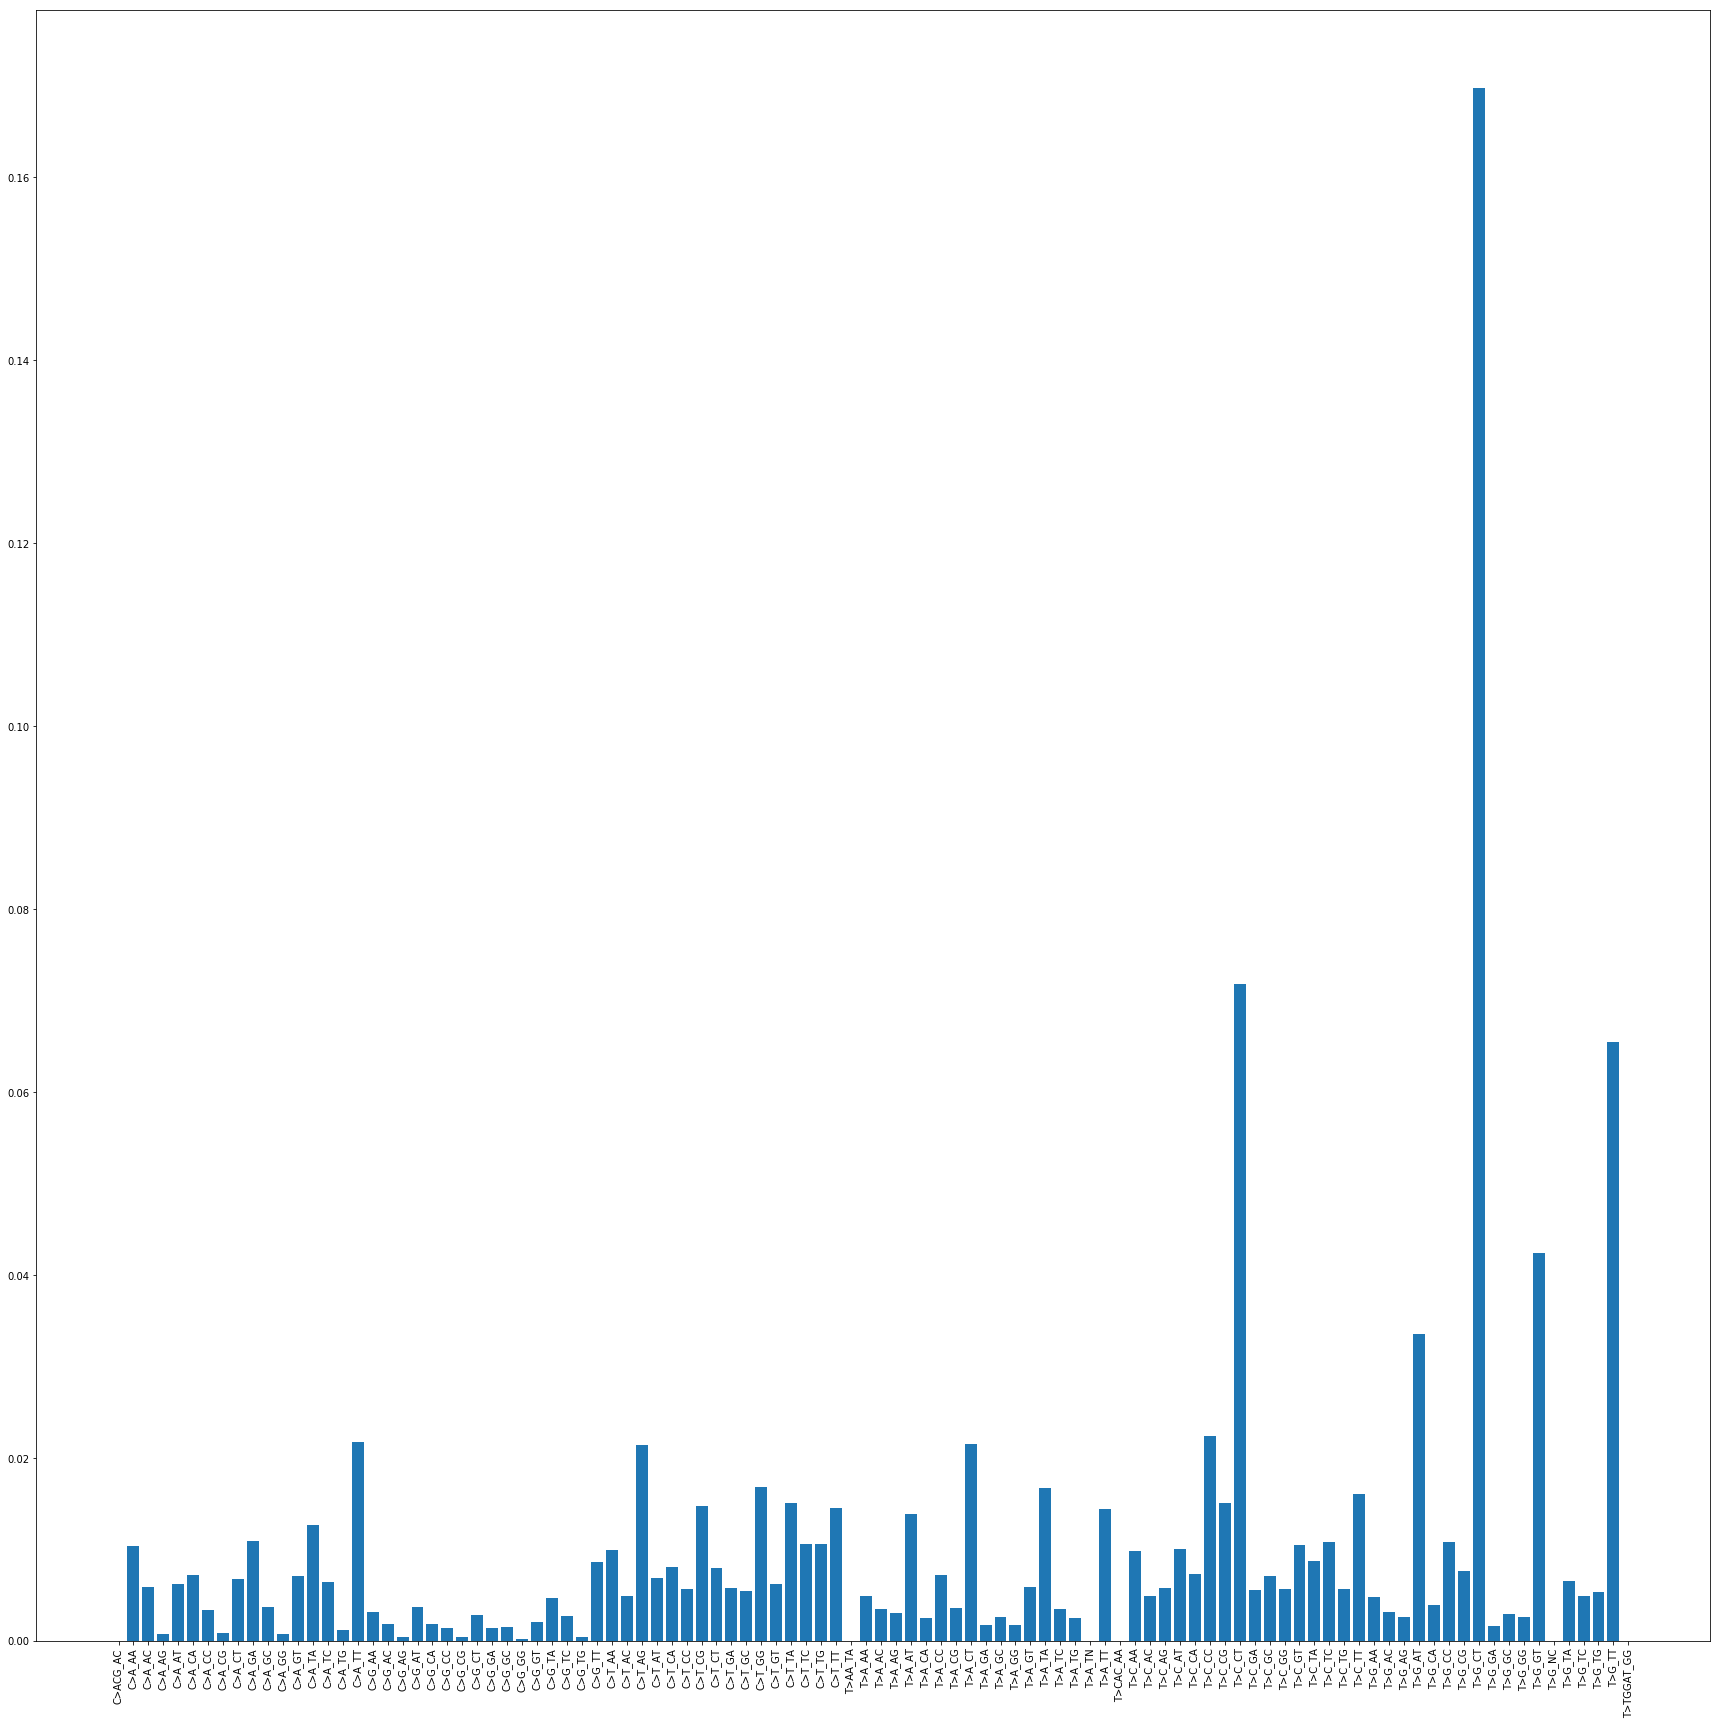

In [60]:
plt.figure(figsize=(30, 30))

plt.bar(range(len(dict_topic0_test_sort)), dict_topic0_test_sort.values(), align='center') 
plt.xticks(range(len(dict_topic0_test_sort)), list(dict_topic0_test_sort.keys()), rotation=90) 

plt.show() 

In [62]:
lda.num_topics

20

In [63]:
lda.show_topic(0)

[('T>G_CT', 0.16976546),
 ('T>C_CT', 0.071820125),
 ('T>G_TT', 0.06540997),
 ('T>G_GT', 0.042402864),
 ('T>G_AT', 0.03352567),
 ('T>C_CC', 0.022325287),
 ('C>A_TT', 0.021713885),
 ('T>A_CT', 0.021446211),
 ('C>T_AG', 0.021395952),
 ('C>T_GG', 0.016764507)]

In [64]:
lda.show_topic(1)

[('C>A_TT', 0.116562404),
 ('C>A_TA', 0.037191145),
 ('C>T_TG', 0.03666825),
 ('C>T_TT', 0.030407758),
 ('C>T_AA', 0.024224605),
 ('C>A_CT', 0.02393561),
 ('C>T_GT', 0.022316113),
 ('T>G_TT', 0.021547949),
 ('C>T_TC', 0.020500101),
 ('T>C_AT', 0.020486293)]

In [69]:
for i in range(lda.num_topics):
    print(sorted(dict(lda.show_topic(i)).items()))

[('C>A_TT', 0.021713885), ('C>T_AG', 0.021395952), ('C>T_GG', 0.016764507), ('T>A_CT', 0.021446211), ('T>C_CC', 0.022325287), ('T>C_CT', 0.071820125), ('T>G_AT', 0.03352567), ('T>G_CT', 0.16976546), ('T>G_GT', 0.042402864), ('T>G_TT', 0.06540997)]
[('C>A_CT', 0.02393561), ('C>A_TA', 0.037191145), ('C>A_TT', 0.116562404), ('C>T_AA', 0.024224605), ('C>T_GT', 0.022316113), ('C>T_TC', 0.020500101), ('C>T_TG', 0.03666825), ('C>T_TT', 0.030407758), ('T>C_AT', 0.020486293), ('T>G_TT', 0.021547949)]
[('C>T_AA', 0.034027457), ('C>T_AG', 0.032124266), ('C>T_CA', 0.021906996), ('C>T_GG', 0.02088985), ('C>T_TT', 0.022178052), ('T>A_TT', 0.020579048), ('T>C_AA', 0.029351728), ('T>C_AT', 0.02549688), ('T>C_TT', 0.03655493), ('T>G_TT', 0.026568254)]
[('C>A_AA', 0.04175801), ('C>A_TA', 0.024245212), ('C>T_AA', 0.041629527), ('C>T_AG', 0.025357673), ('C>T_CT', 0.019106887), ('C>T_TT', 0.0881009), ('T>A_AA', 0.03365017), ('T>C_AA', 0.042605985), ('T>C_TT', 0.024612734), ('T>G_TT', 0.023510275)]
[('C>T_A

In [68]:
dict(lda.show_topic(0)).items()

dict_items([('T>G_CT', 0.16976546), ('T>C_CT', 0.071820125), ('T>G_TT', 0.06540997), ('T>G_GT', 0.042402864), ('T>G_AT', 0.03352567), ('T>C_CC', 0.022325287), ('C>A_TT', 0.021713885), ('T>A_CT', 0.021446211), ('C>T_AG', 0.021395952), ('C>T_GG', 0.016764507)])

In [ ]:
dict(sorted(dict(lda.show_topic(i)).items()))

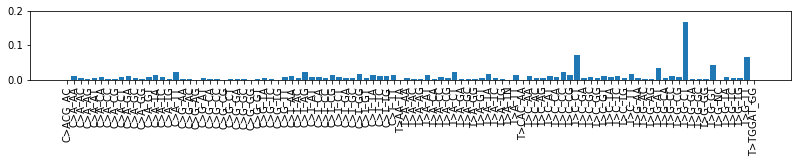

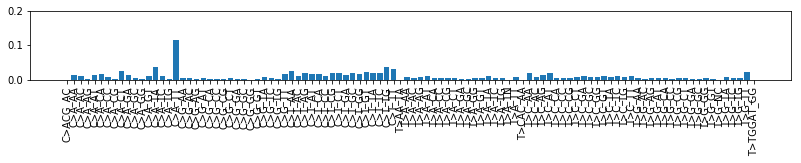

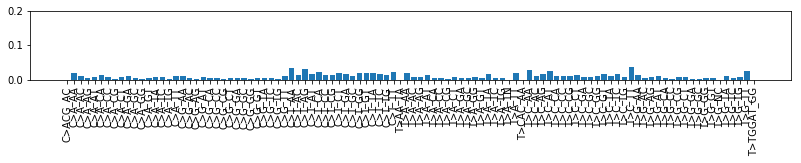

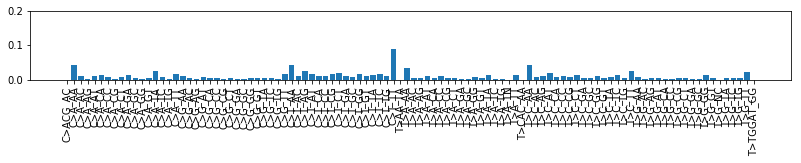

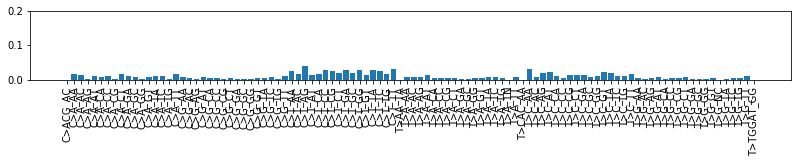

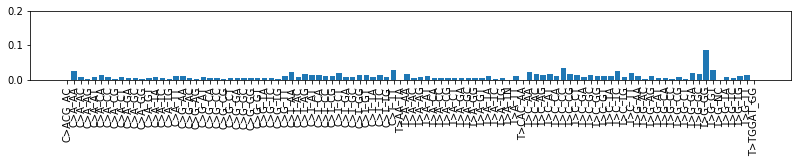

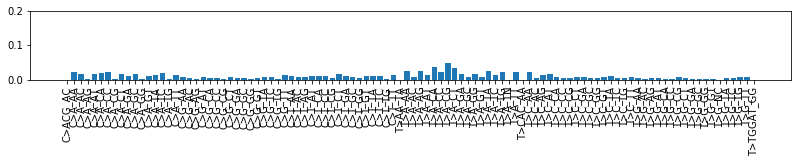

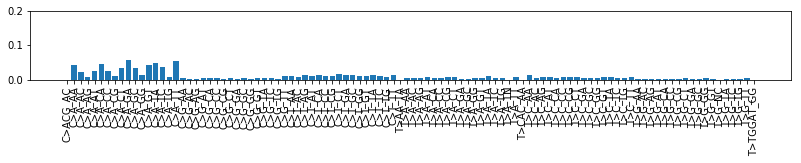

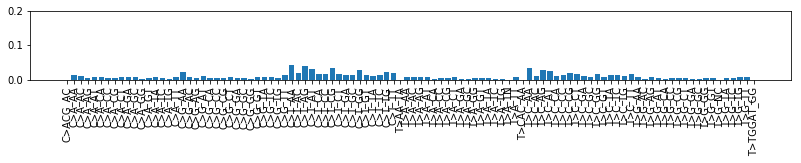

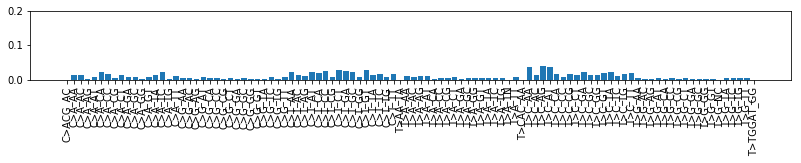

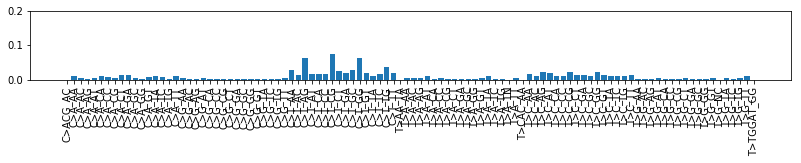

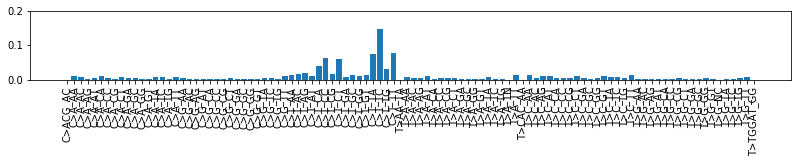

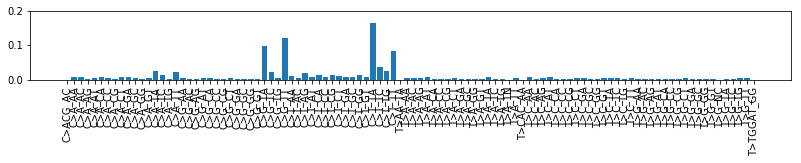

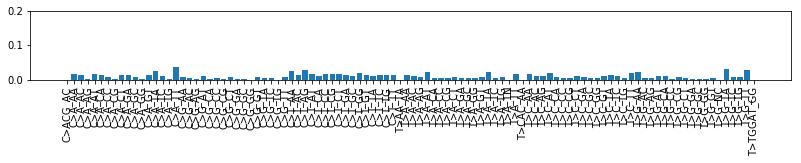

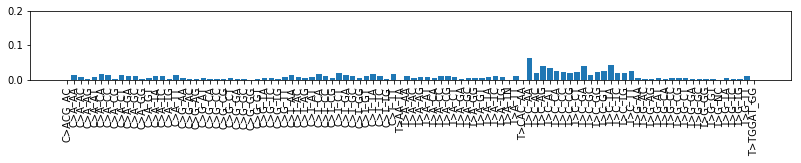

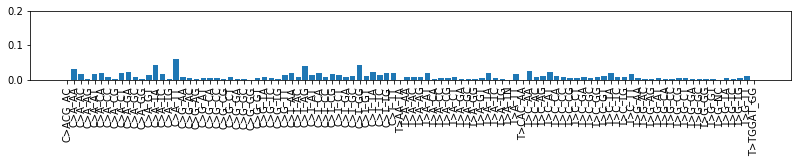

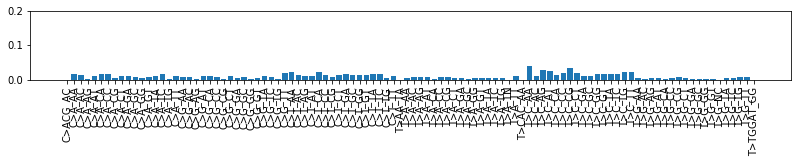

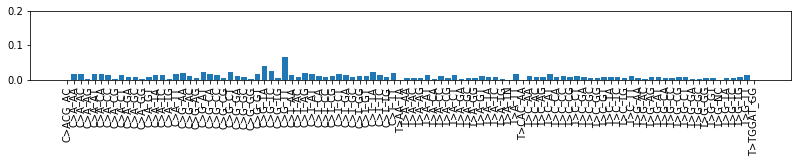

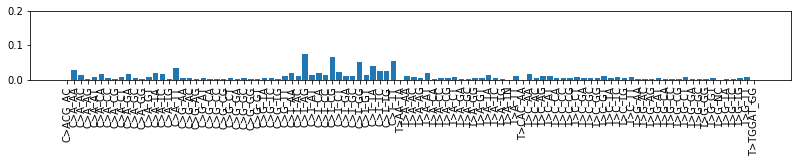

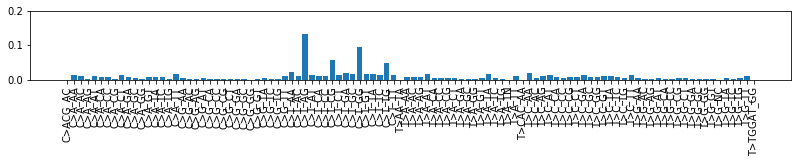

In [84]:
for i in range(lda.num_topics):
    plt.figure(figsize=(30,30))
    plt.subplot(lda.num_topics,2,i+1)
    dict_topic=dict(sorted(dict(lda.show_topic(i,102)).items()))
    plt.ylim(0,0.2)
    plt.bar(range(len(dict_topic)), dict_topic.values(), align='center') 
    plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90) 
    #plt.show() 

#plt.savefig('topic_test_1.png')

In [77]:
len(lda.show_topic(3))

10

In [74]:
len(lda.show_topic(3,1000))

102

In [73]:
len(lda.show_topic(1,1000))

102

In [75]:
lda.show_topic(3,1000)

[('C>T_TT', 0.0881009),
 ('T>C_AA', 0.042605985),
 ('C>A_AA', 0.04175801),
 ('C>T_AA', 0.041629527),
 ('T>A_AA', 0.03365017),
 ('C>T_AG', 0.025357673),
 ('T>C_TT', 0.024612734),
 ('C>A_TA', 0.024245212),
 ('T>G_TT', 0.023510275),
 ('C>T_CT', 0.019106887),
 ('T>C_AT', 0.01814795),
 ('C>T_GG', 0.017690774),
 ('C>T_TC', 0.017325789),
 ('C>A_TT', 0.017085062),
 ('C>G_TT', 0.016721265),
 ('C>T_CG', 0.015903905),
 ('C>T_AT', 0.015900113),
 ('C>A_GA', 0.0147956265),
 ('C>A_CA', 0.014626373),
 ('T>A_TT', 0.014088083),
 ('C>T_TA', 0.013843163),
 ('T>C_CT', 0.013330389),
 ('T>C_TC', 0.0133083565),
 ('T>A_TA', 0.013061548),
 ('T>G_GG', 0.012339404),
 ('C>T_TG', 0.011810252),
 ('T>C_GG', 0.011733094),
 ('C>A_AC', 0.011133172),
 ('C>G_AA', 0.011056969),
 ('C>T_GT', 0.010973179),
 ('C>T_GA', 0.010797983),
 ('C>A_AT', 0.010494823),
 ('T>C_CC', 0.010469709),
 ('T>A_AT', 0.010297478),
 ('T>A_CC', 0.010193546),
 ('T>C_AG', 0.010141747),
 ('C>T_CC', 0.010129663),
 ('C>T_AC', 0.00972198),
 ('C>T_CA', 0.00

In [76]:
lda.show_topic(4,1000)

[('C>T_AG', 0.03927544),
 ('C>T_TT', 0.032159112),
 ('T>C_AA', 0.03163027),
 ('C>T_CC', 0.02828209),
 ('C>T_GG', 0.028150473),
 ('C>T_GA', 0.027205369),
 ('C>T_TA', 0.026831198),
 ('C>T_AA', 0.026553623),
 ('C>T_CG', 0.026148492),
 ('C>T_TC', 0.024893349),
 ('T>C_AT', 0.022651572),
 ('T>C_GT', 0.02135722),
 ('C>T_CT', 0.020743128),
 ('T>C_AG', 0.0197157),
 ('T>C_TA', 0.019501802),
 ('C>T_GC', 0.019020315),
 ('C>T_TG', 0.01736631),
 ('C>A_AA', 0.016456451),
 ('C>T_CA', 0.016241014),
 ('T>C_TT', 0.016015913),
 ('C>T_AC', 0.01542102),
 ('C>A_TT', 0.015394959),
 ('C>A_CT', 0.015209537),
 ('T>C_CT', 0.014847282),
 ('C>T_GT', 0.014661562),
 ('C>T_AT', 0.014274581),
 ('T>C_GA', 0.01308039),
 ('T>C_CG', 0.012807584),
 ('T>A_AT', 0.01256767),
 ('C>A_AC', 0.012418423),
 ('T>C_GG', 0.012017484),
 ('C>G_TT', 0.011646112),
 ('T>C_CA', 0.011203275),
 ('T>C_TC', 0.01115211),
 ('C>A_TC', 0.010858576),
 ('T>C_TG', 0.010517784),
 ('C>A_TA', 0.010289614),
 ('T>G_TT', 0.010239812),
 ('C>A_AT', 0.009951172

要素をまとめる  
色を変更する

In [85]:
import matplotlib.colors as mcolors

In [87]:
import numpy as np

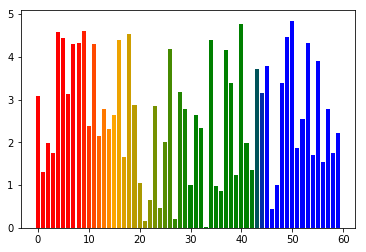

In [88]:
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 60
x = np.arange(N).astype(float)
y = np.random.uniform(0, 5, size=(N,))

plt.bar(x,y, color=rvb(x/N))
plt.show()

In [150]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59.])

In [90]:
range(len(dict_topic))

range(0, 102)

In [93]:
#dict_topic

In [ ]:
dict(lda.show_topic(0,102)).items()

In [101]:
#dict(lda.show_topic(0,102)).keys()

In [123]:
list_lda_show_topic_count=[]
for i in dict(sorted(lda.show_topic(0,102))).keys():
    list_lda_show_topic_count.append(i[0:3])

In [122]:
dict(sorted(lda.show_topic(0,102))).keys()

dict_keys(['C>ACG_AC', 'C>A_AA', 'C>A_AC', 'C>A_AG', 'C>A_AT', 'C>A_CA', 'C>A_CC', 'C>A_CG', 'C>A_CT', 'C>A_GA', 'C>A_GC', 'C>A_GG', 'C>A_GT', 'C>A_TA', 'C>A_TC', 'C>A_TG', 'C>A_TT', 'C>G_AA', 'C>G_AC', 'C>G_AG', 'C>G_AT', 'C>G_CA', 'C>G_CC', 'C>G_CG', 'C>G_CT', 'C>G_GA', 'C>G_GC', 'C>G_GG', 'C>G_GT', 'C>G_TA', 'C>G_TC', 'C>G_TG', 'C>G_TT', 'C>T_AA', 'C>T_AC', 'C>T_AG', 'C>T_AT', 'C>T_CA', 'C>T_CC', 'C>T_CG', 'C>T_CT', 'C>T_GA', 'C>T_GC', 'C>T_GG', 'C>T_GT', 'C>T_TA', 'C>T_TC', 'C>T_TG', 'C>T_TT', 'T>AA_TA', 'T>A_AA', 'T>A_AC', 'T>A_AG', 'T>A_AT', 'T>A_CA', 'T>A_CC', 'T>A_CG', 'T>A_CT', 'T>A_GA', 'T>A_GC', 'T>A_GG', 'T>A_GT', 'T>A_TA', 'T>A_TC', 'T>A_TG', 'T>A_TN', 'T>A_TT', 'T>CAC_AA', 'T>C_AA', 'T>C_AC', 'T>C_AG', 'T>C_AT', 'T>C_CA', 'T>C_CC', 'T>C_CG', 'T>C_CT', 'T>C_GA', 'T>C_GC', 'T>C_GG', 'T>C_GT', 'T>C_TA', 'T>C_TC', 'T>C_TG', 'T>C_TT', 'T>G_AA', 'T>G_AC', 'T>G_AG', 'T>G_AT', 'T>G_CA', 'T>G_CC', 'T>G_CG', 'T>G_CT', 'T>G_GA', 'T>G_GC', 'T>G_GG', 'T>G_GT', 'T>G_NC', 'T>G_TA', 'T>G

In [125]:
#list_lda_show_topic_count

In [107]:
#要素のカウント

In [108]:
import collections

In [126]:
dict_count_lda=collections.Counter(list_lda_show_topic_count)

In [127]:
dict_count_lda

Counter({'C>A': 17,
         'C>G': 16,
         'C>T': 16,
         'T>A': 18,
         'T>C': 17,
         'T>G': 17,
         'T>T': 1})

In [136]:
rvb

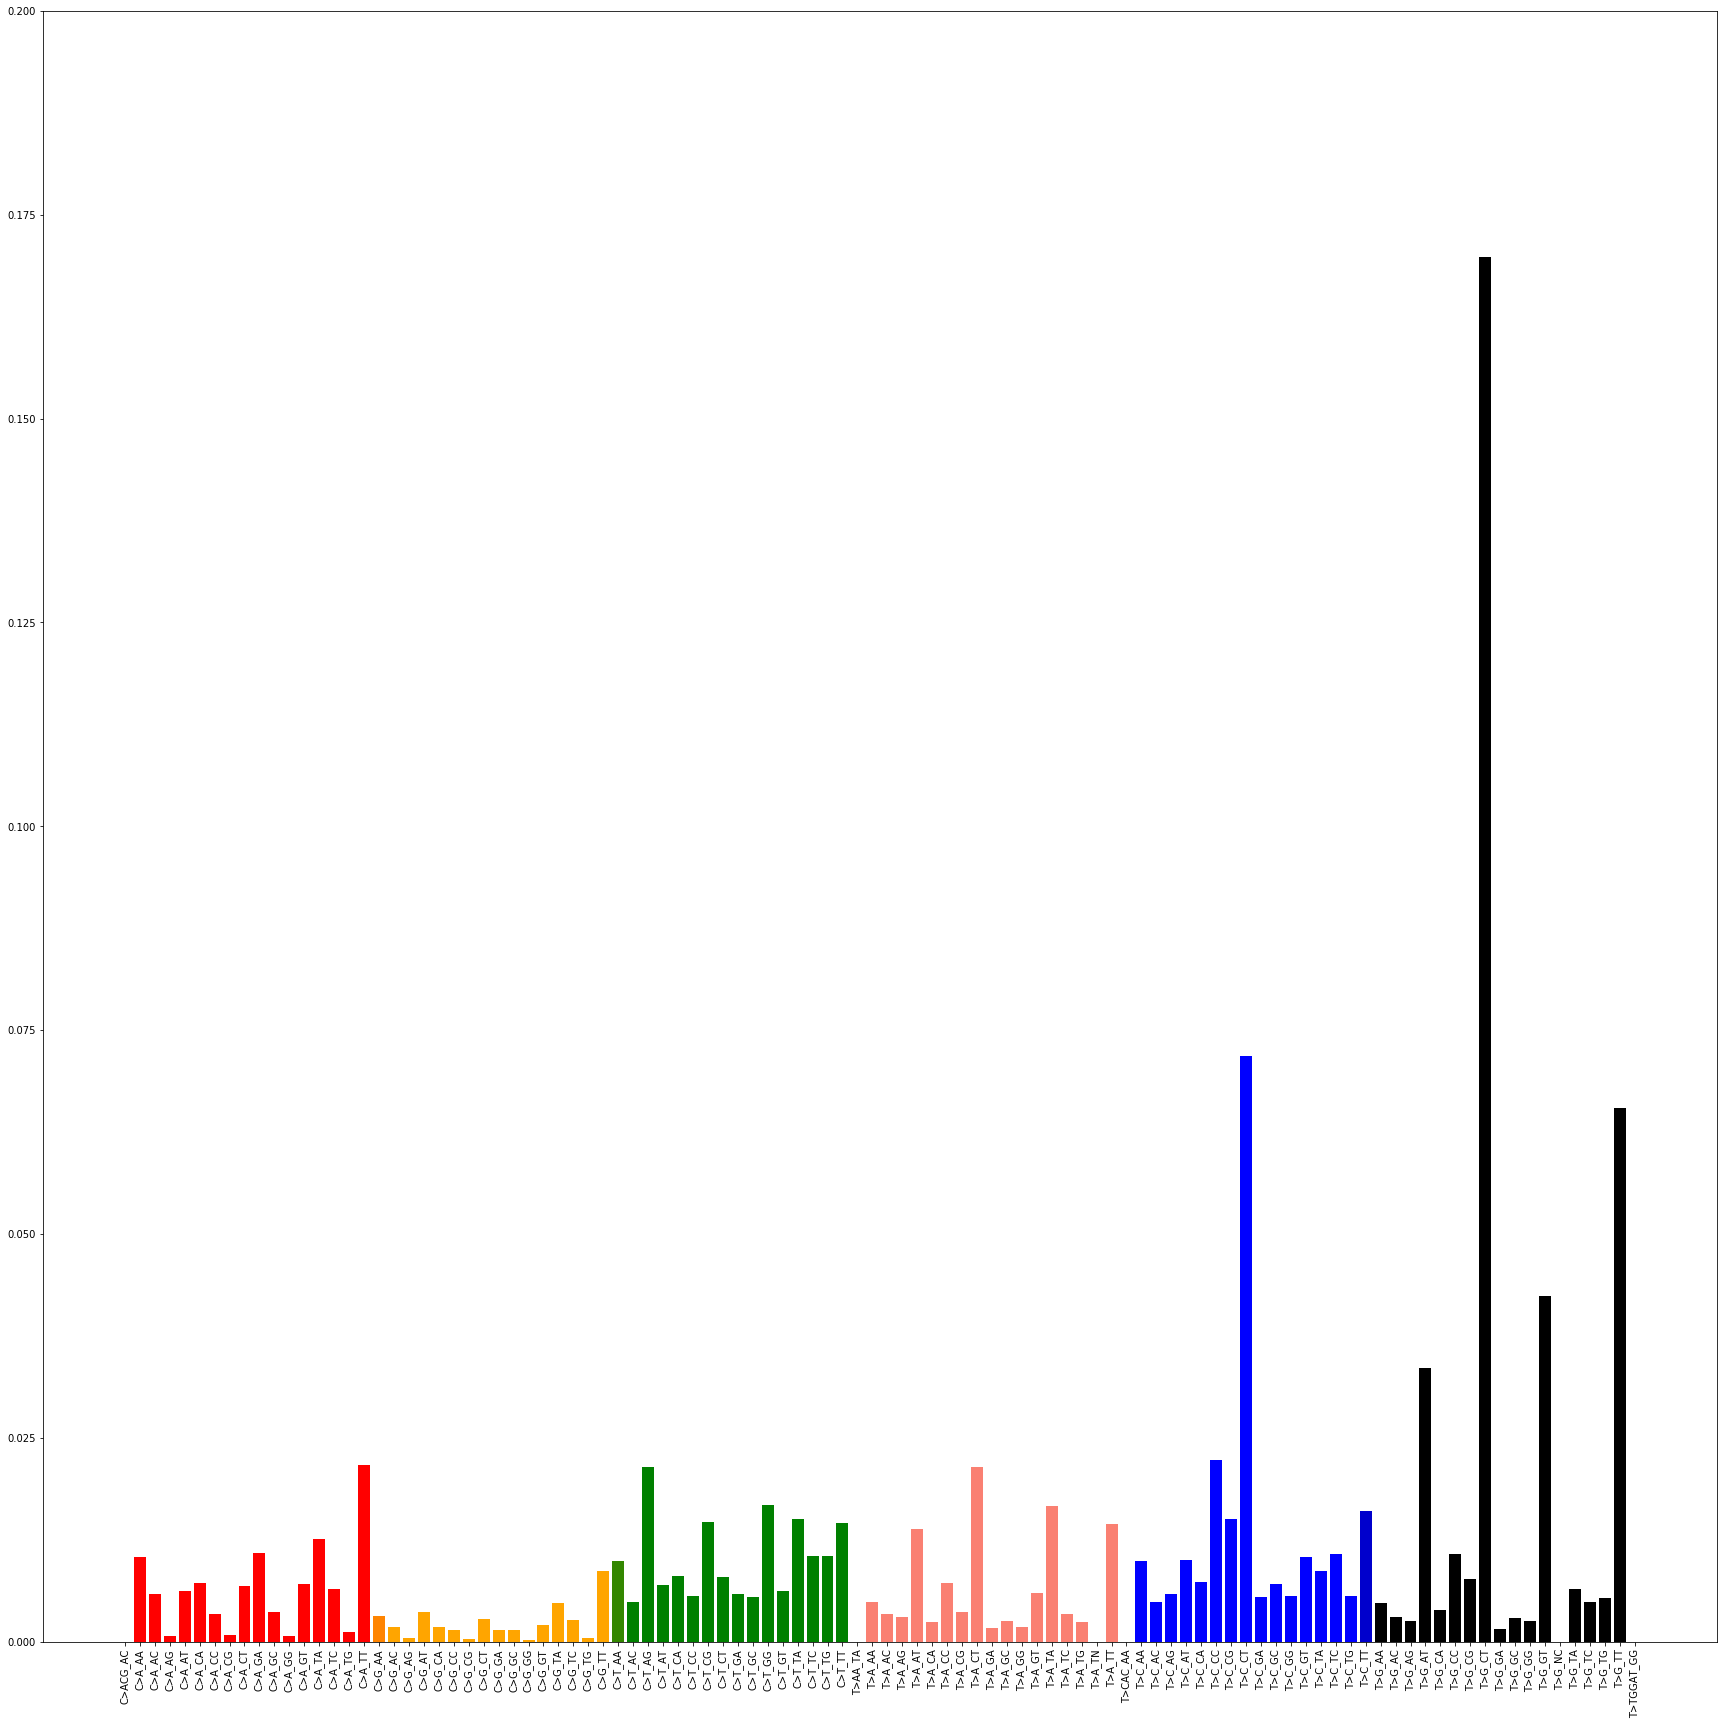

In [152]:
clist=[(0, "red"), (16/102, "red"),\
       (17/102, "orange"),(32/102, "orange"),\
       (33/102, "green"),(48/102, "green"),\
       (49/102, "salmon"),(66/102, "salmon"),\
       (67/102, "blue"),(83/102, "blue"),\
       (84/102, "black"),(102/102, "black")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

n=102
plt.figure(figsize=(30,30))
dict_topic=dict(sorted(dict(lda.show_topic(0,102)).items()))
x=np.array(range(len(dict_topic)))
plt.ylim(0,0.2)
plt.bar(range(len(dict_topic)), dict_topic.values(), align='center',color=rvb(x/102)) 
plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90) 
plt.show() 

色変更（cosmicにならう）

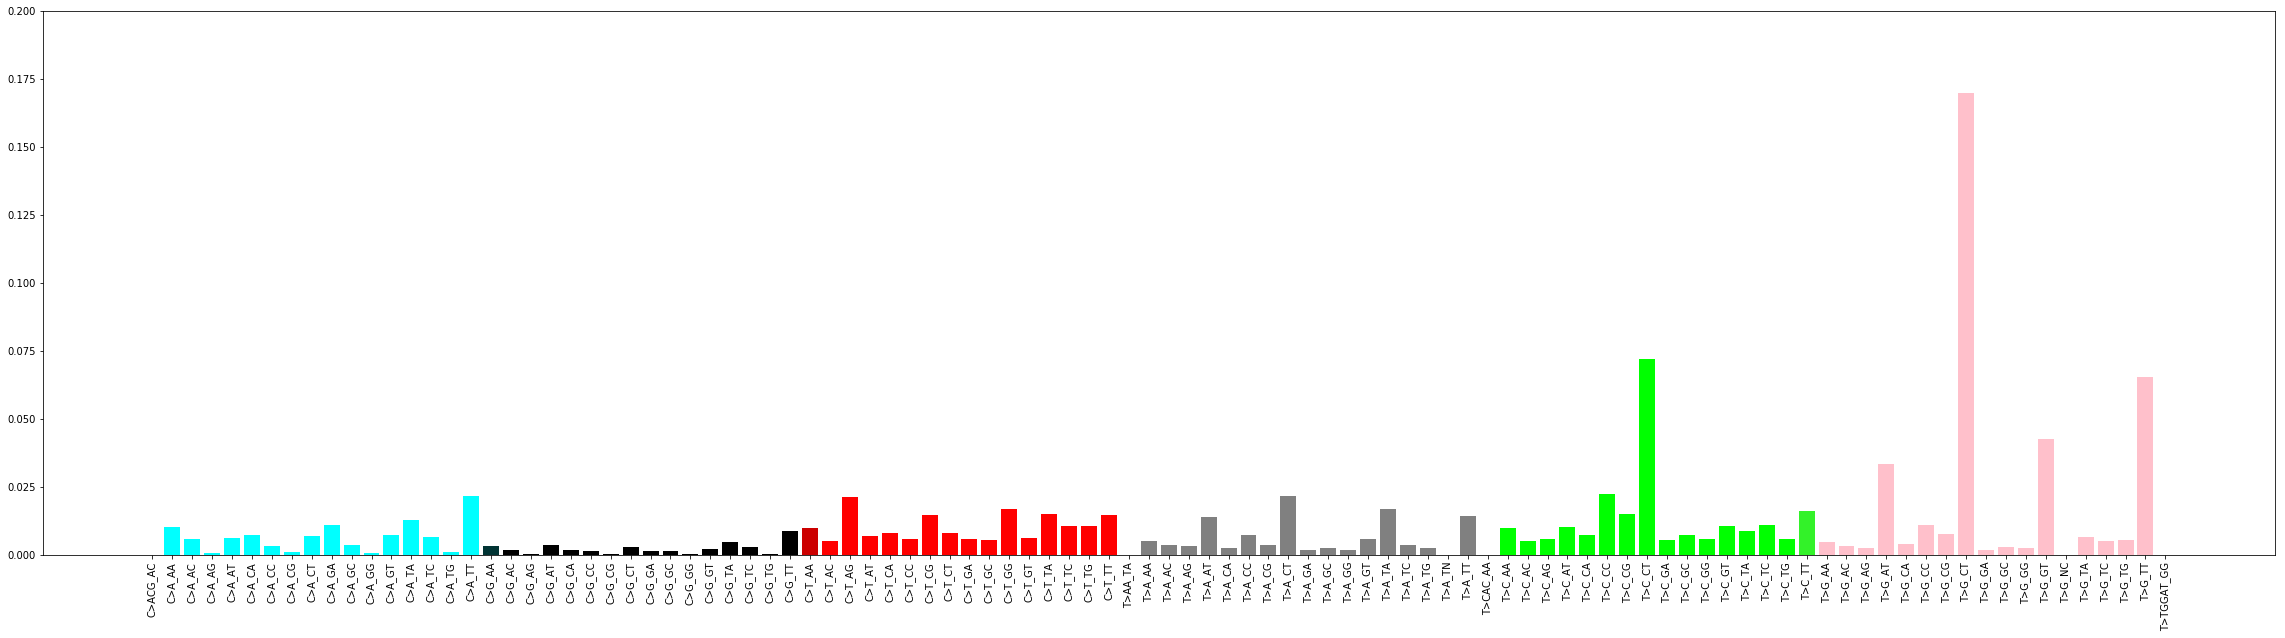

In [165]:
clist=[(0, "aqua"), (16/102, "aqua"),\
       (17/102, "black"),(32/102, "black"),\
       (33/102, "red"),(48/102, "red"),\
       (49/102, "gray"),(66/102, "gray"),\
       (67/102, "lime"),(83/102, "lime"),\
       (84/102, "pink"),(102/102, "pink")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

n=102
plt.figure(figsize=(40,10))
dict_topic=dict(sorted(dict(lda.show_topic(0,102)).items()))
x=np.array(range(len(dict_topic)))
plt.ylim(0,0.2)
plt.bar(range(len(dict_topic)), dict_topic.values(), align='center',color=rvb(x/102)) 
plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90) 
plt.show() 

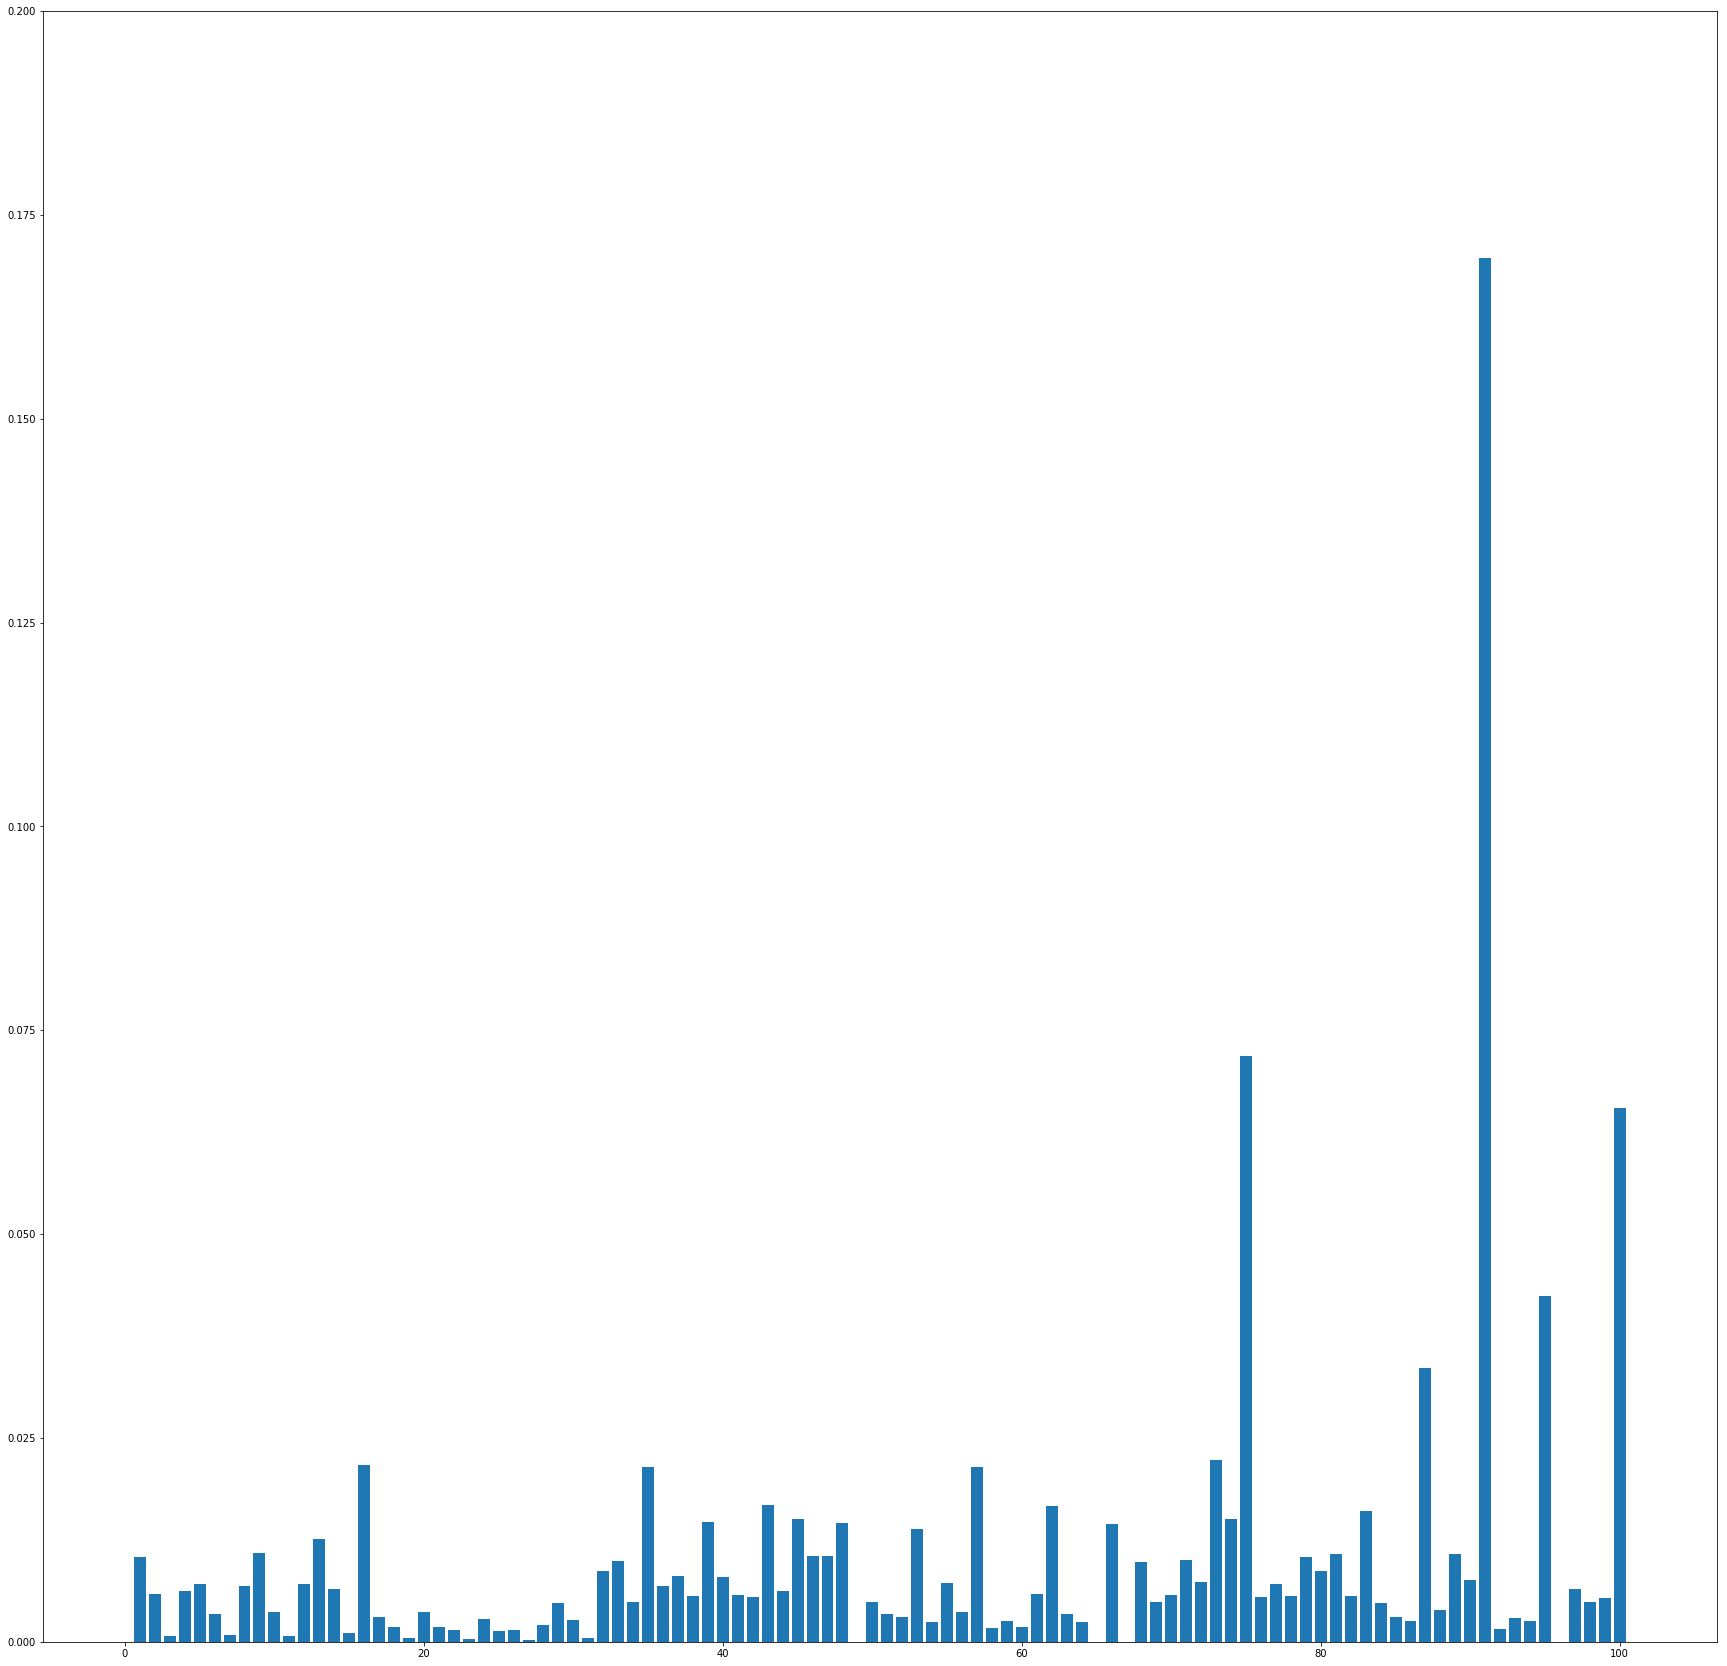

In [132]:
plt.figure(figsize=(30,30))
dict_topic=dict(sorted(dict(lda.show_topic(0,102)).items()))
plt.ylim(0,0.2)
plt.bar(range(len(dict_topic)), dict_topic.values(), align='center') 
#plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90) 
plt.show() 

複数で

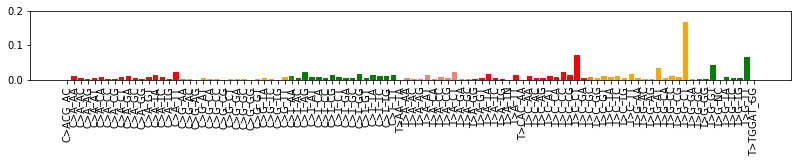

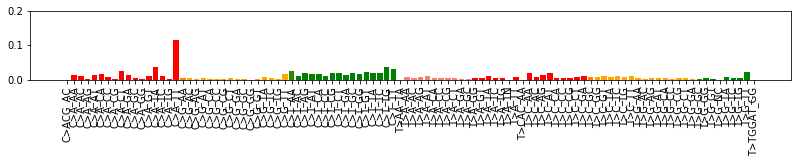

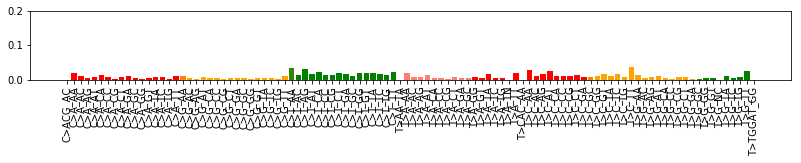

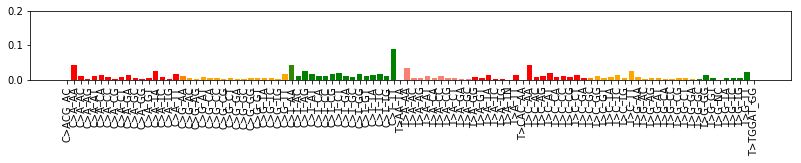

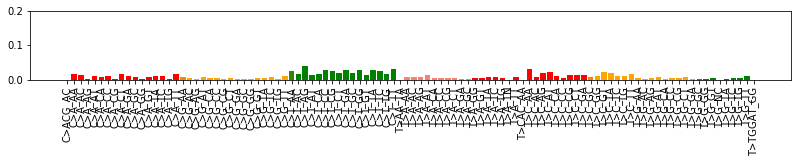

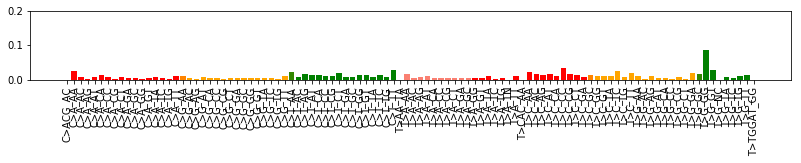

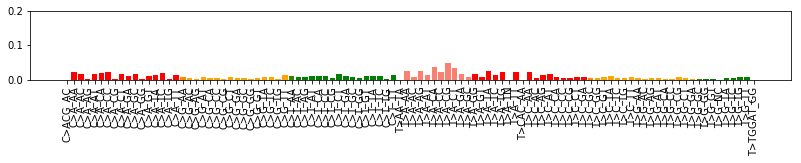

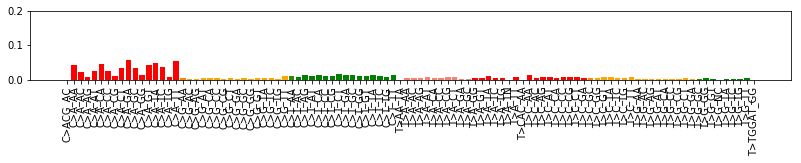

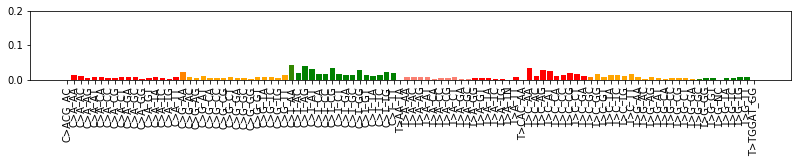

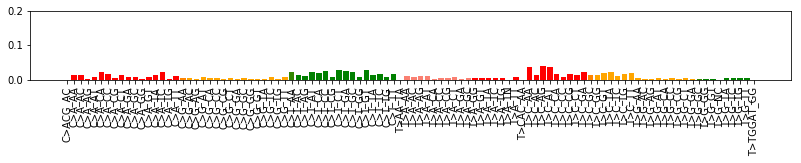

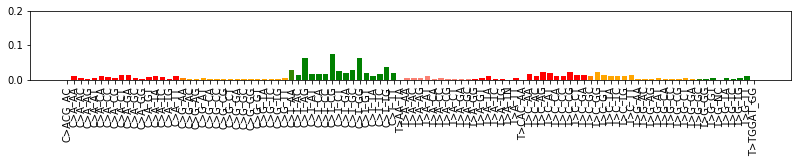

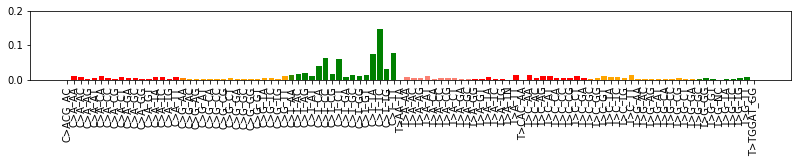

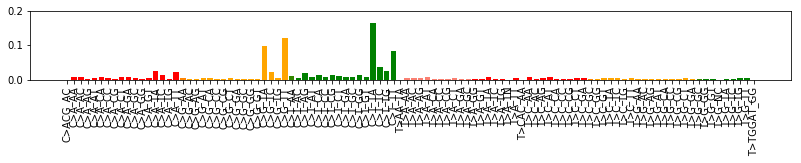

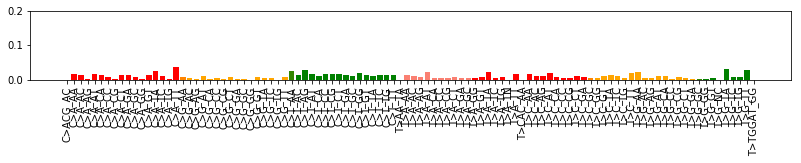

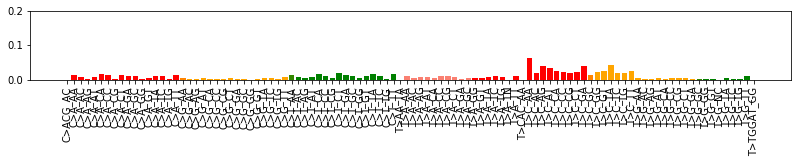

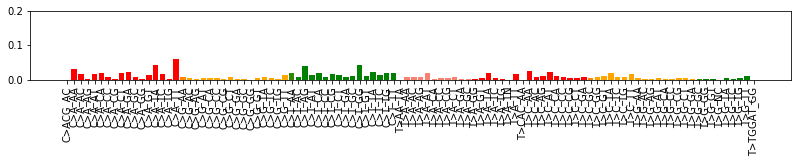

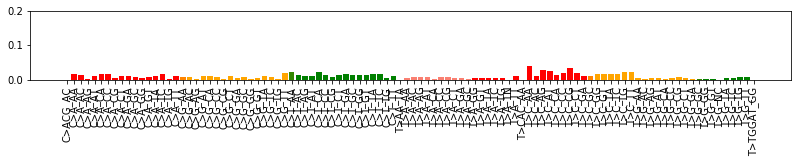

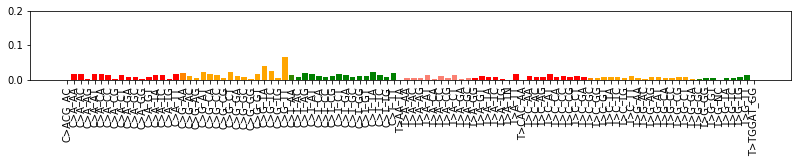

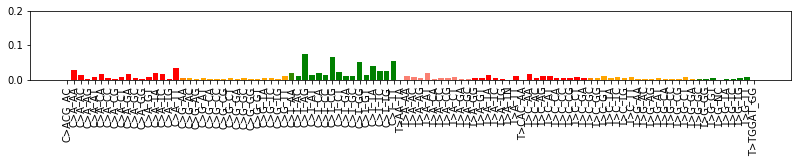

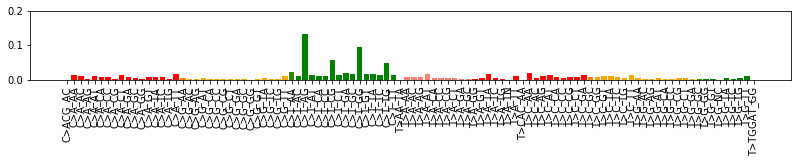

In [147]:
clist=[(0, "red"), (16/102, "red"),\
       (17/102, "orange"),(32/102, "orange"),\
       (33/102, "green"),(48/102, "green"),\
       (49/102, "salmon"),(73/102, "salmon"),\
       (74/102, "blue"),(83/102, "blue"),\
       (84/102, "black"),(102/102, "black")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
n=102

for i in range(lda.num_topics):
    plt.figure(figsize=(30,30))
    plt.subplot(lda.num_topics,2,i+1)
    dict_topic=dict(sorted(dict(lda.show_topic(i,102)).items()))
    plt.ylim(0,0.2)
    plt.bar(range(len(dict_topic)), dict_topic.values(), align='center',color=rvb(x/102)) 
    plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90)  

plt.savefig('topic_test_color_1.png')

ｙ軸限定なしで

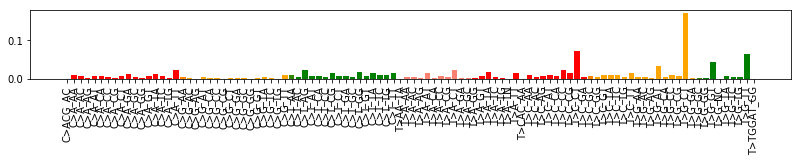

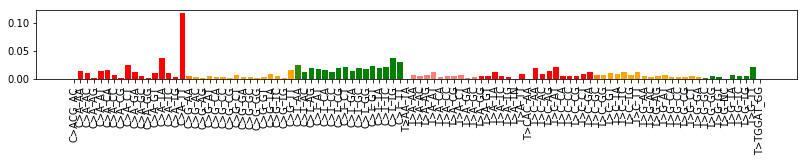

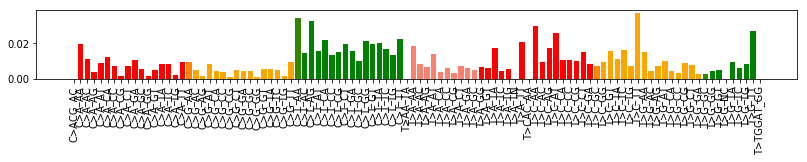

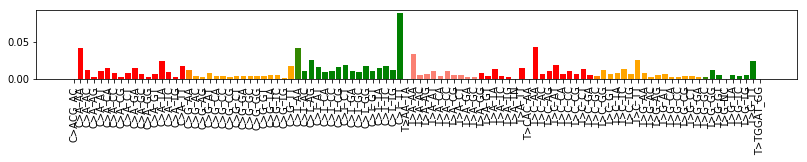

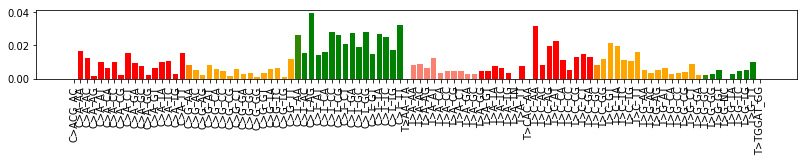

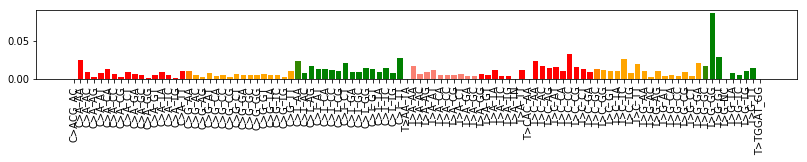

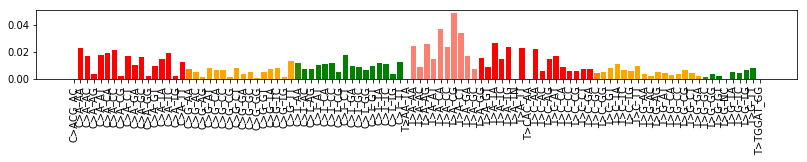

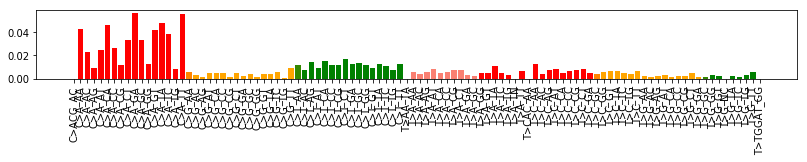

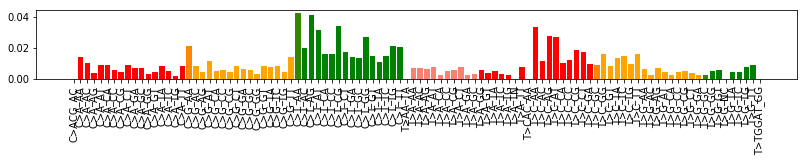

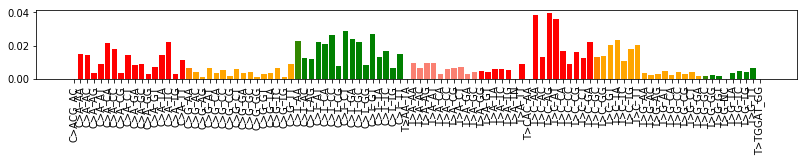

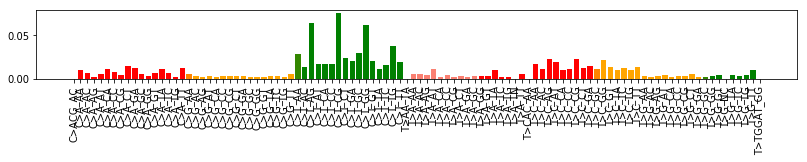

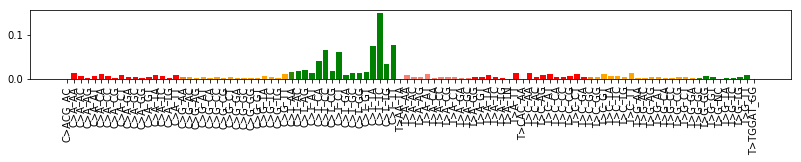

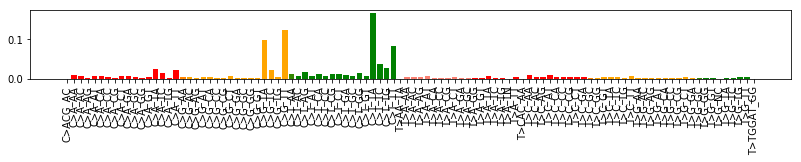

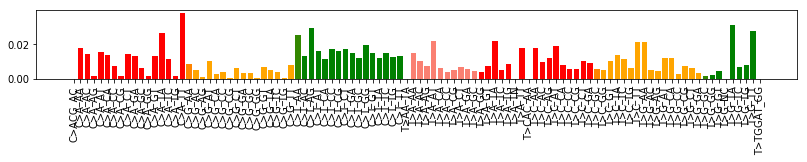

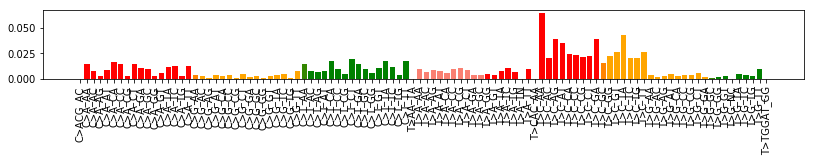

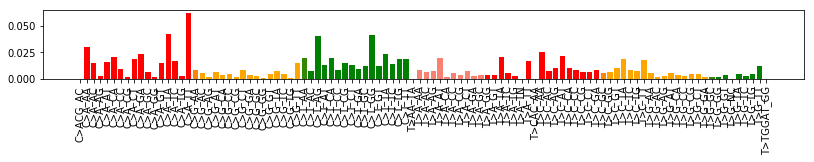

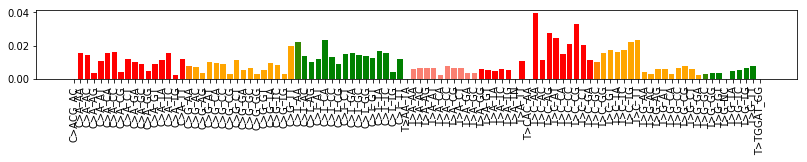

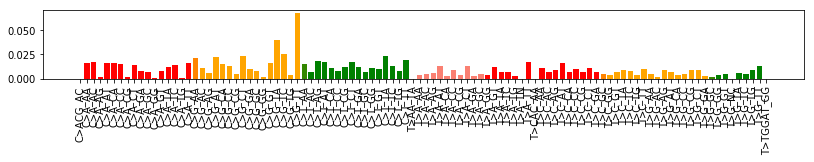

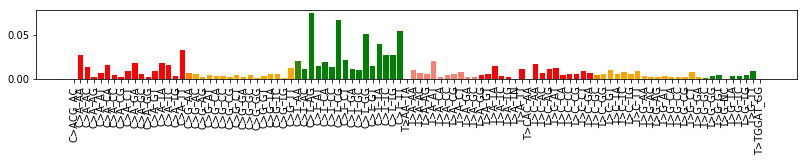

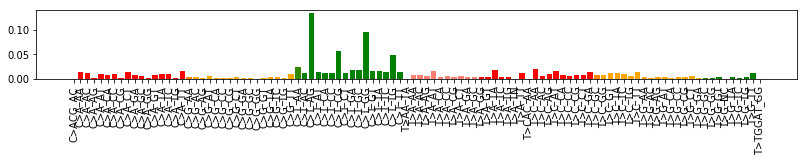

In [149]:
clist=[(0, "red"), (16/102, "red"),\
       (17/102, "orange"),(32/102, "orange"),\
       (33/102, "green"),(48/102, "green"),\
       (49/102, "salmon"),(73/102, "salmon"),\
       (74/102, "blue"),(83/102, "blue"),\
       (84/102, "black"),(102/102, "black")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
n=102

for i in range(lda.num_topics):
    plt.figure(figsize=(30,30))
    plt.subplot(lda.num_topics,2,i+1)
    dict_topic=dict(sorted(dict(lda.show_topic(i,102)).items()))
    plt.bar(range(len(dict_topic)), dict_topic.values(), align='center',color=rvb(x/102)) 
    plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90)  

一つずつ画像として保存

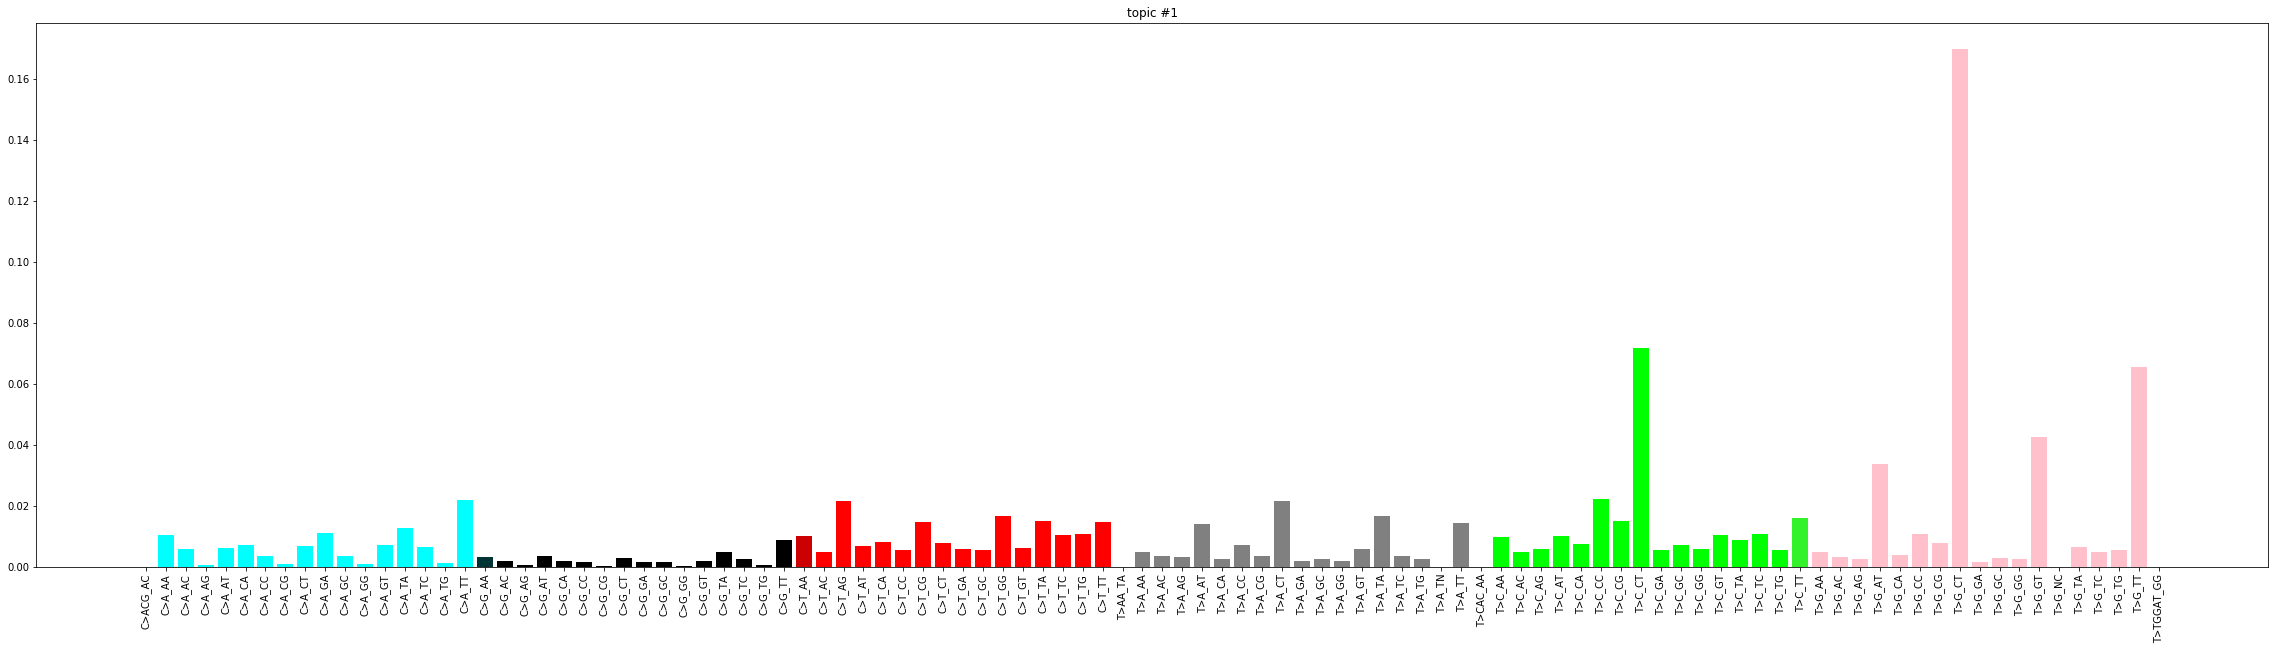

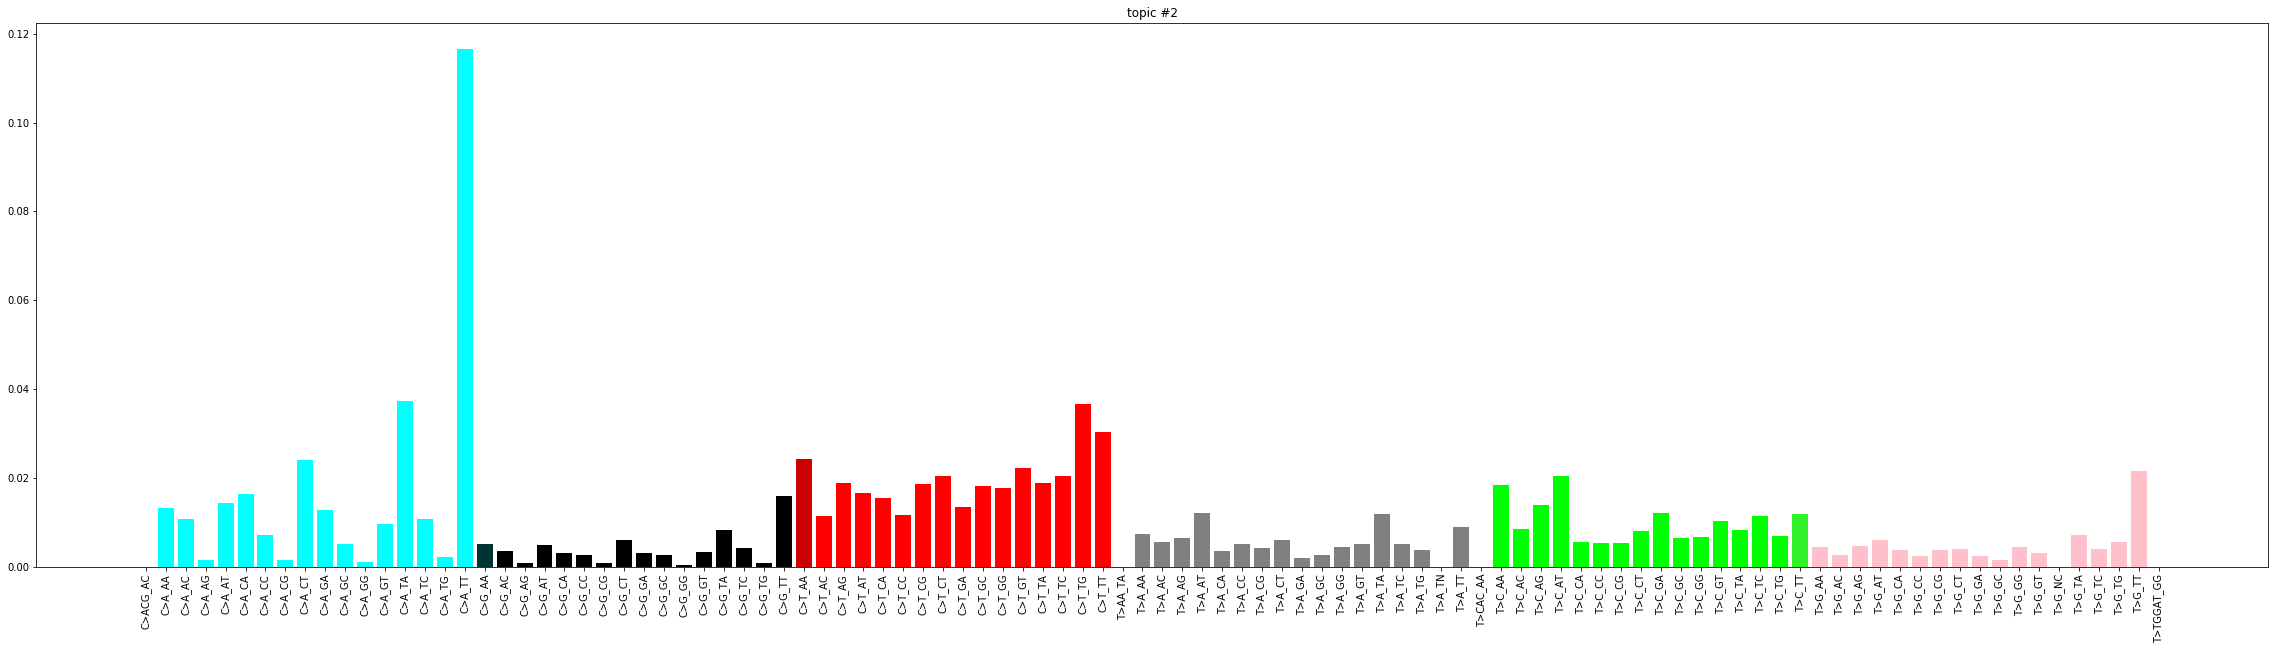

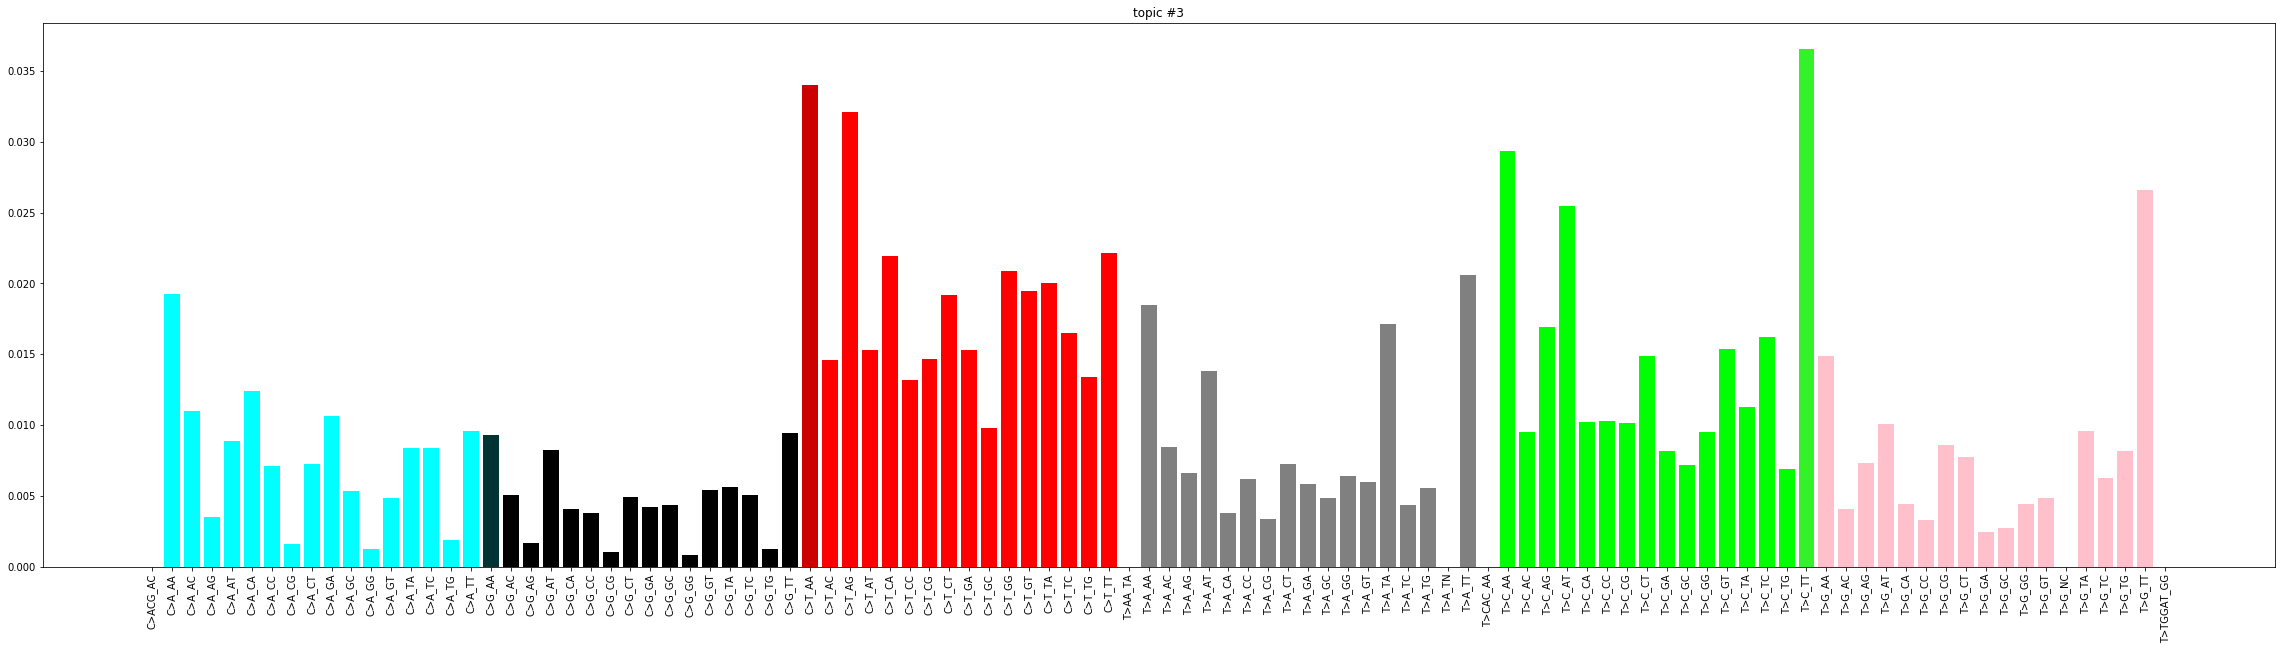

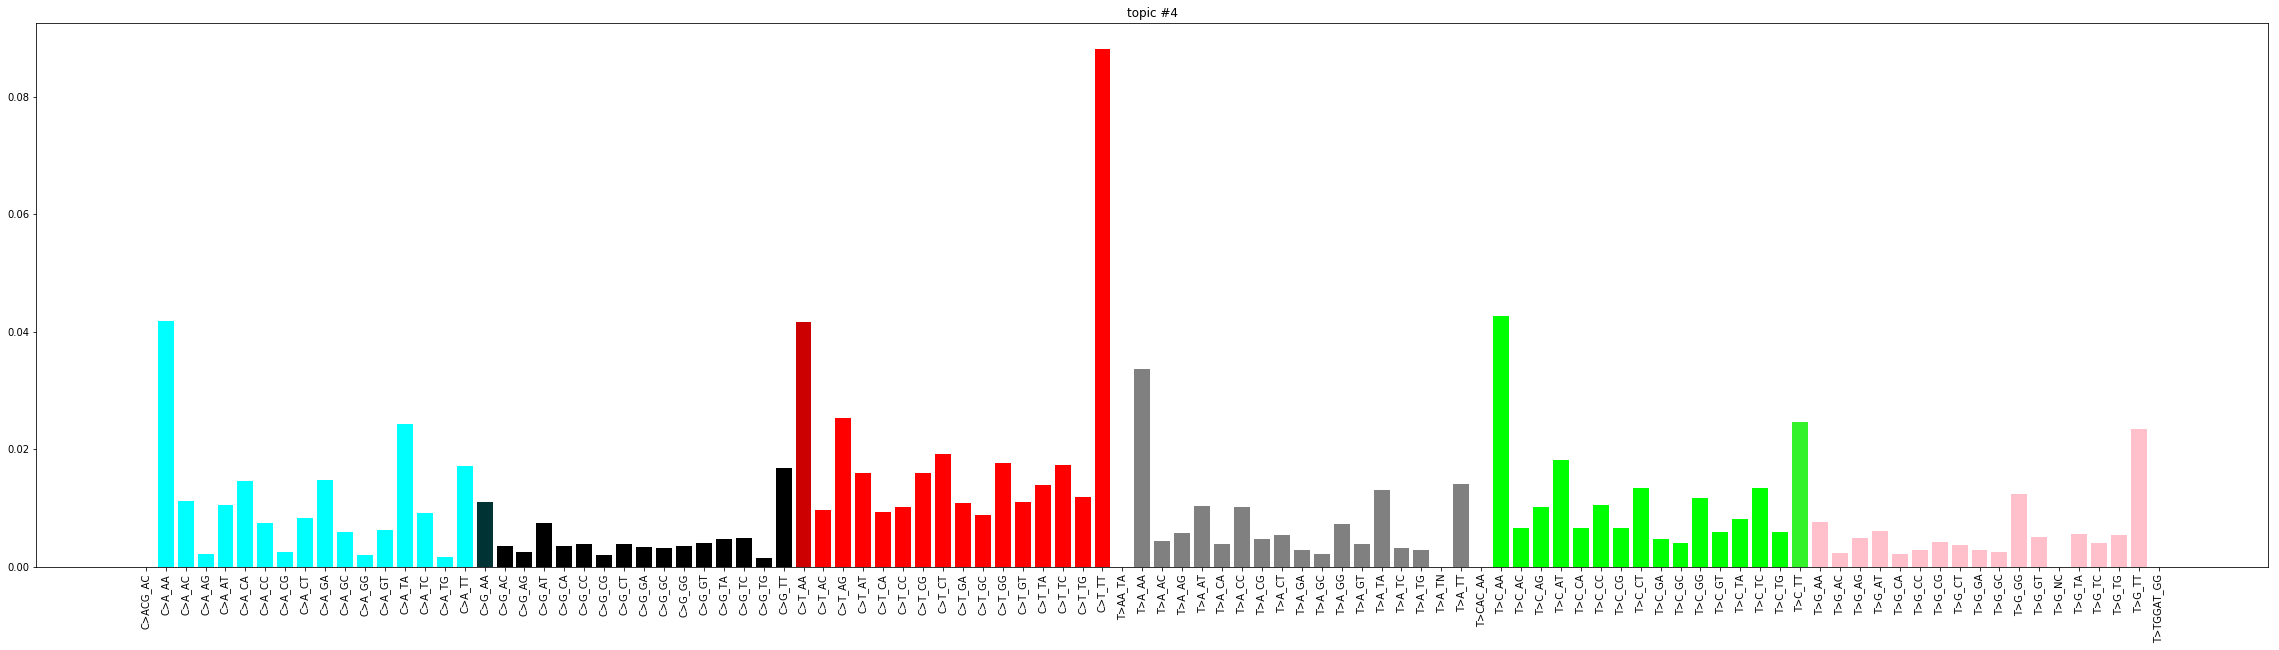

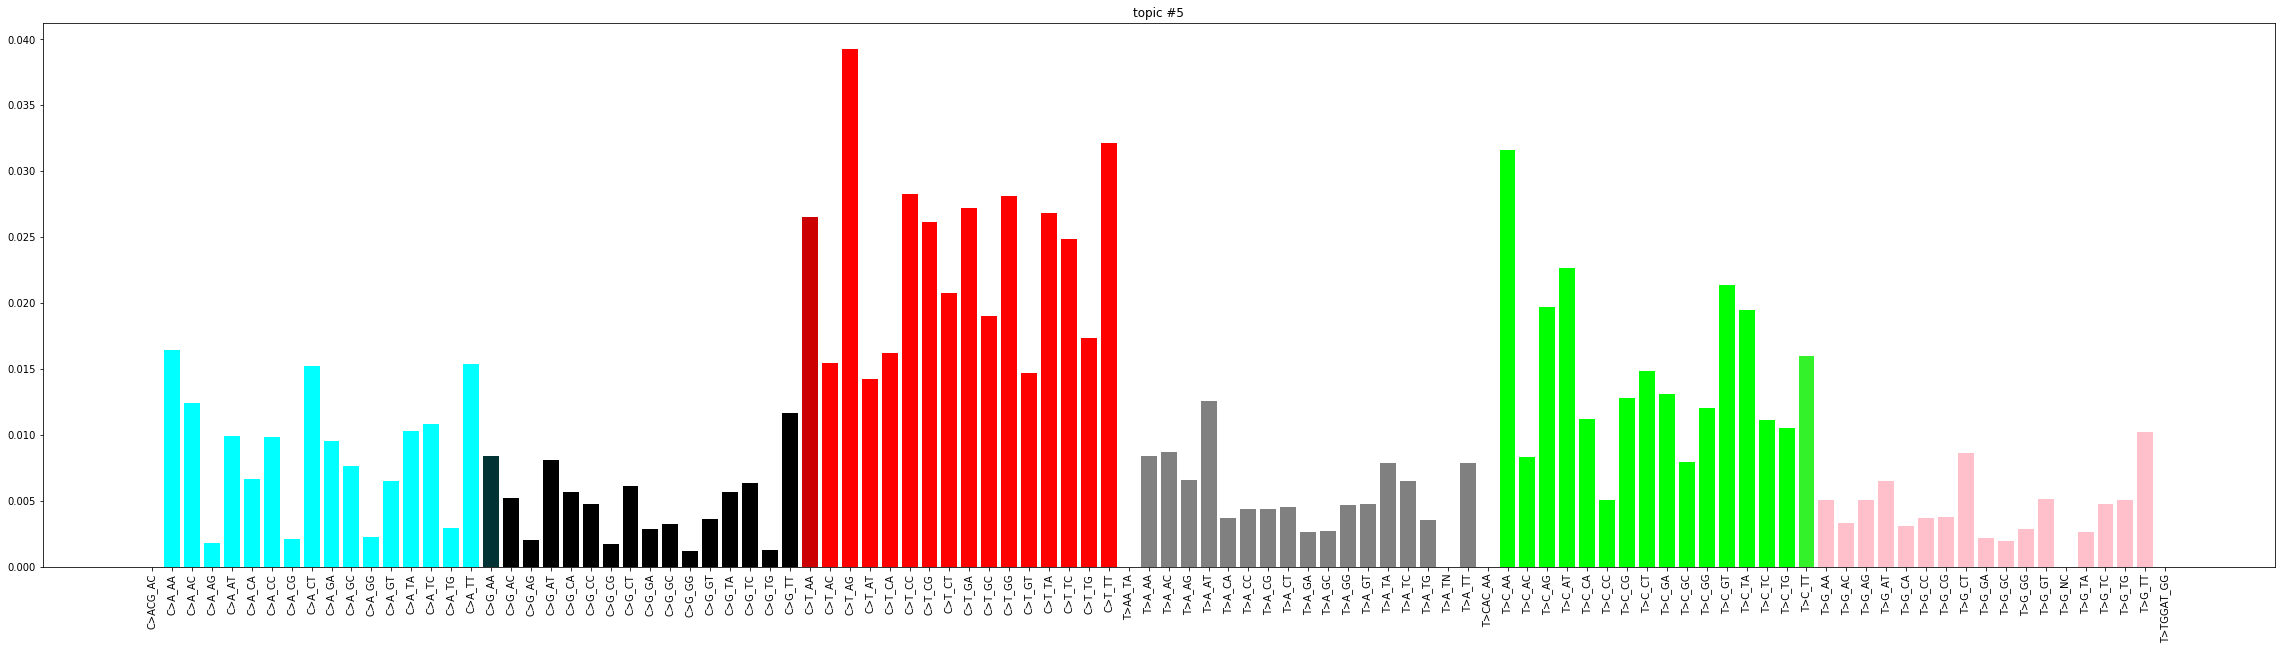

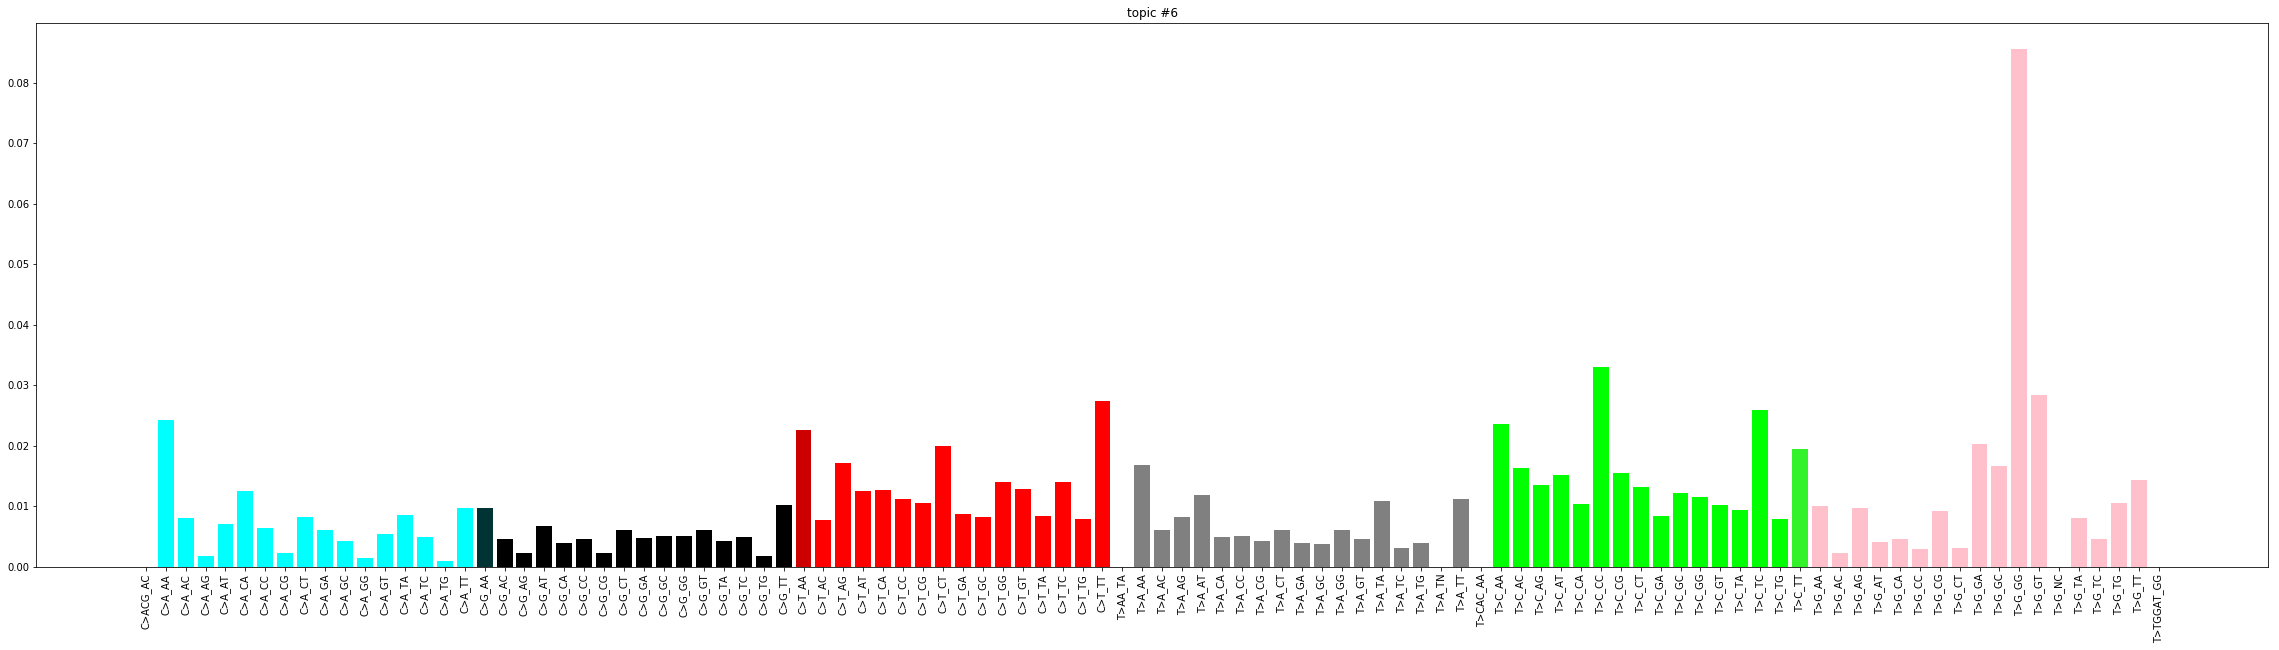

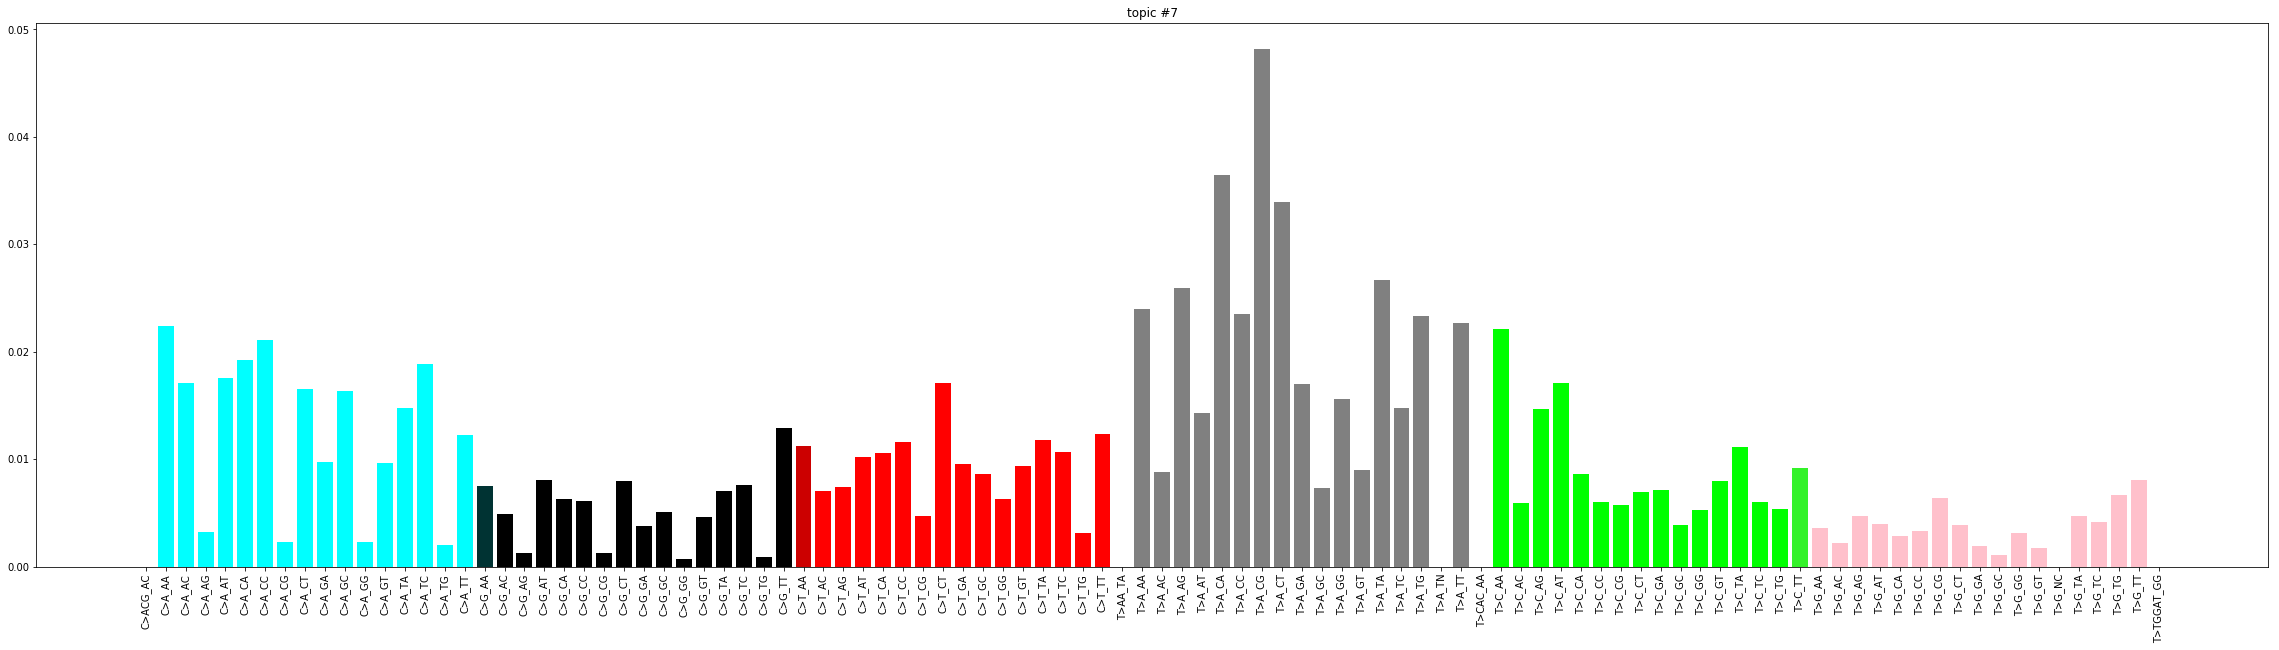

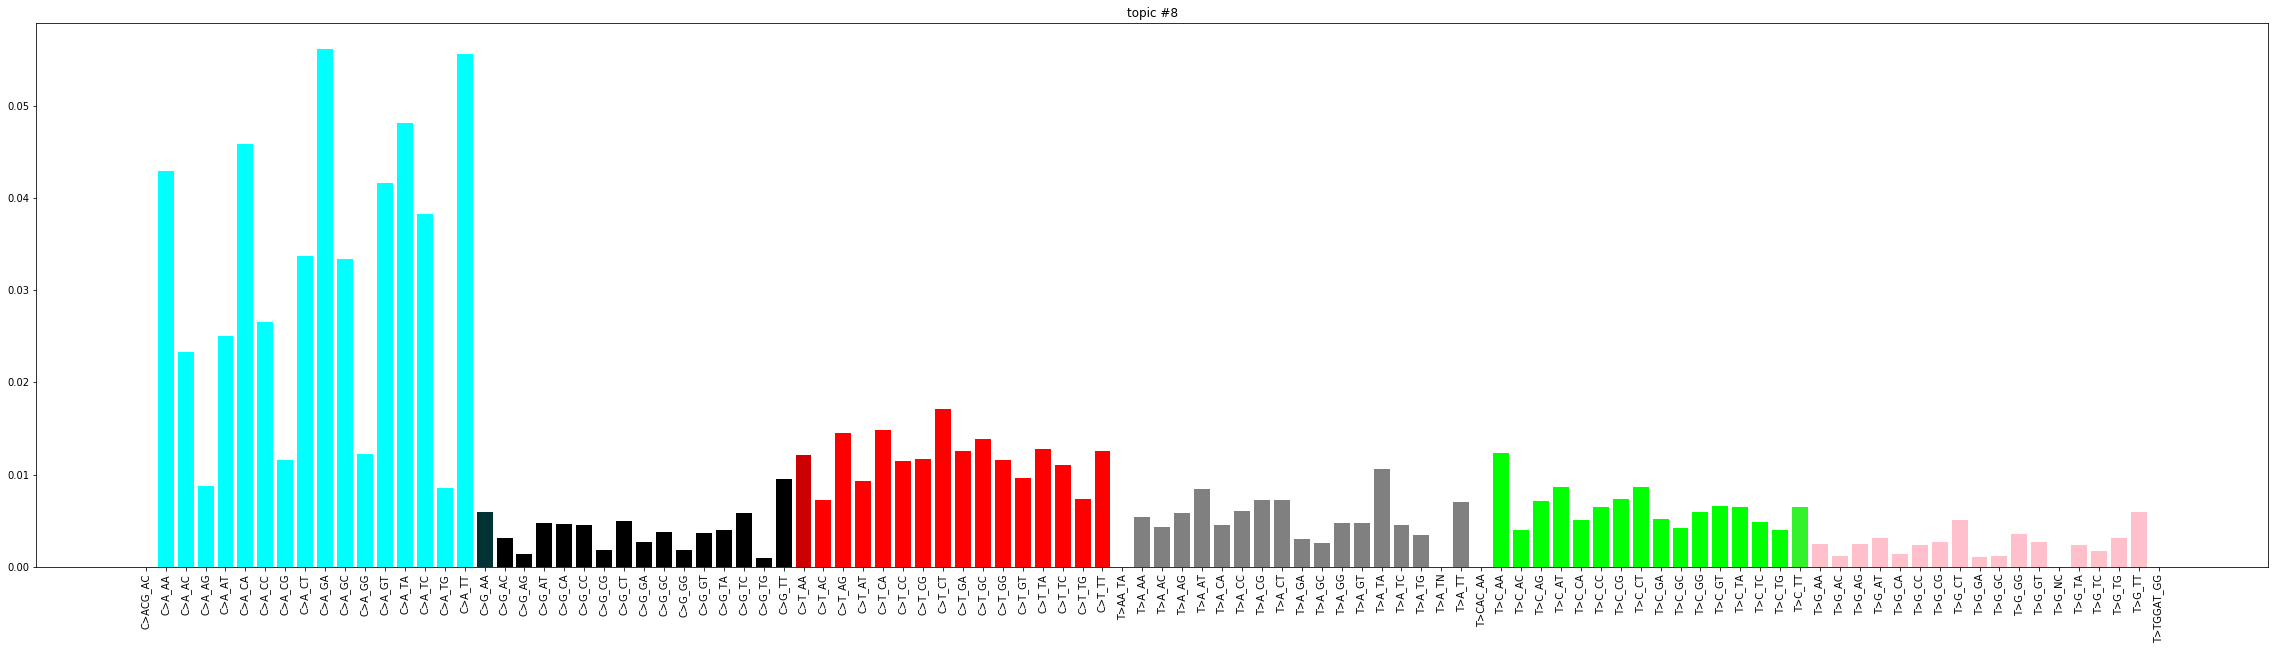

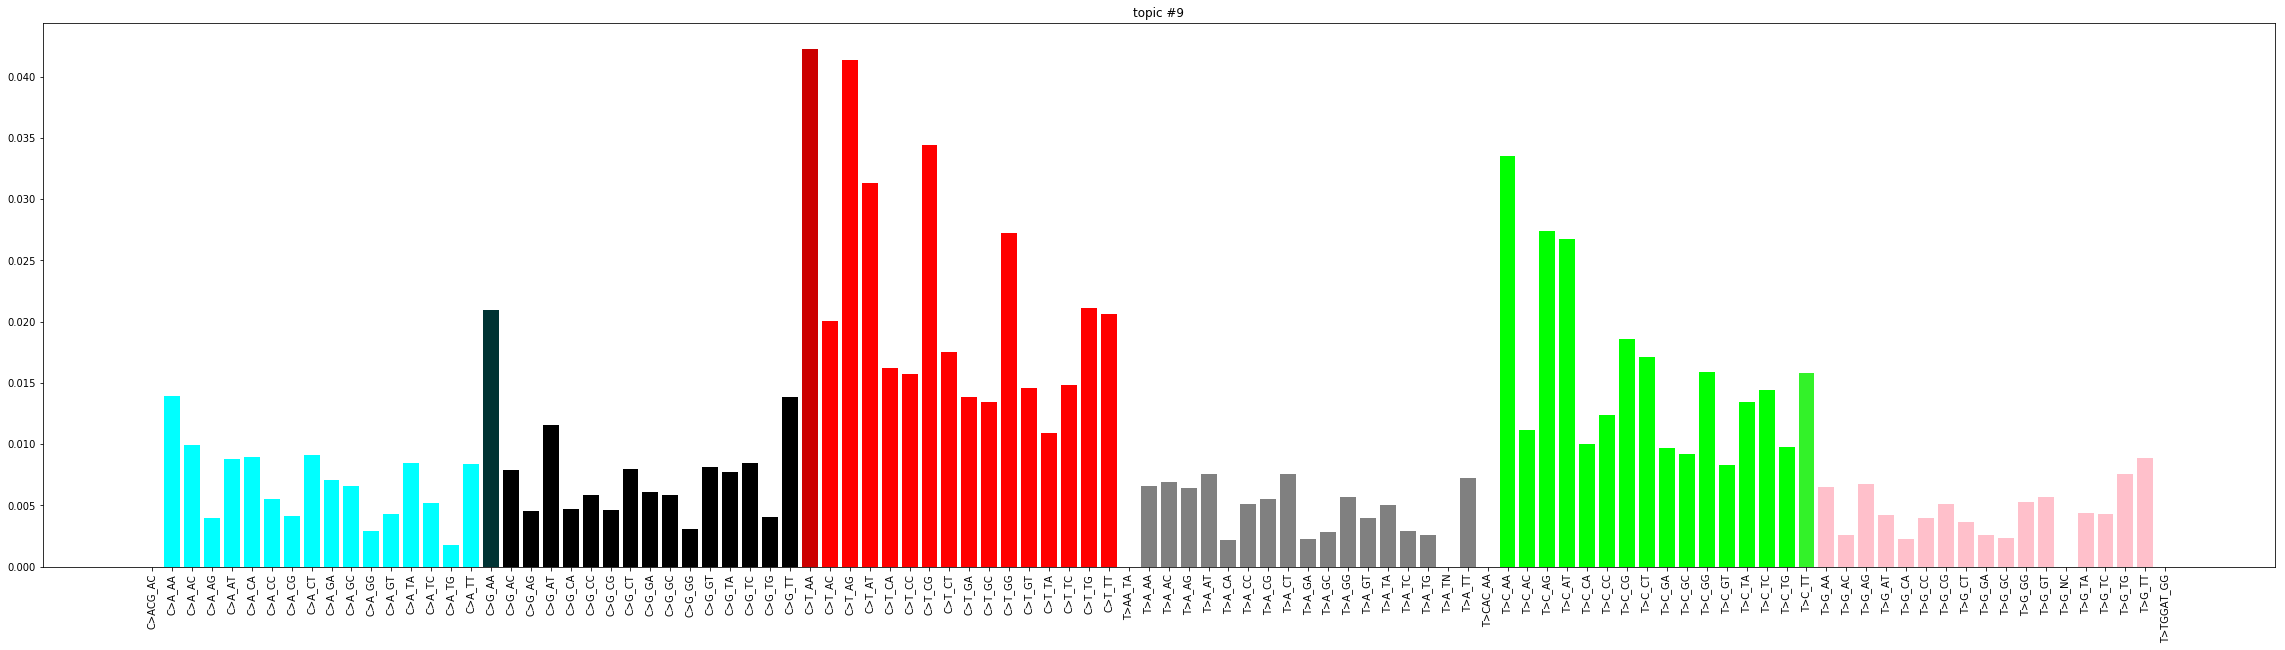

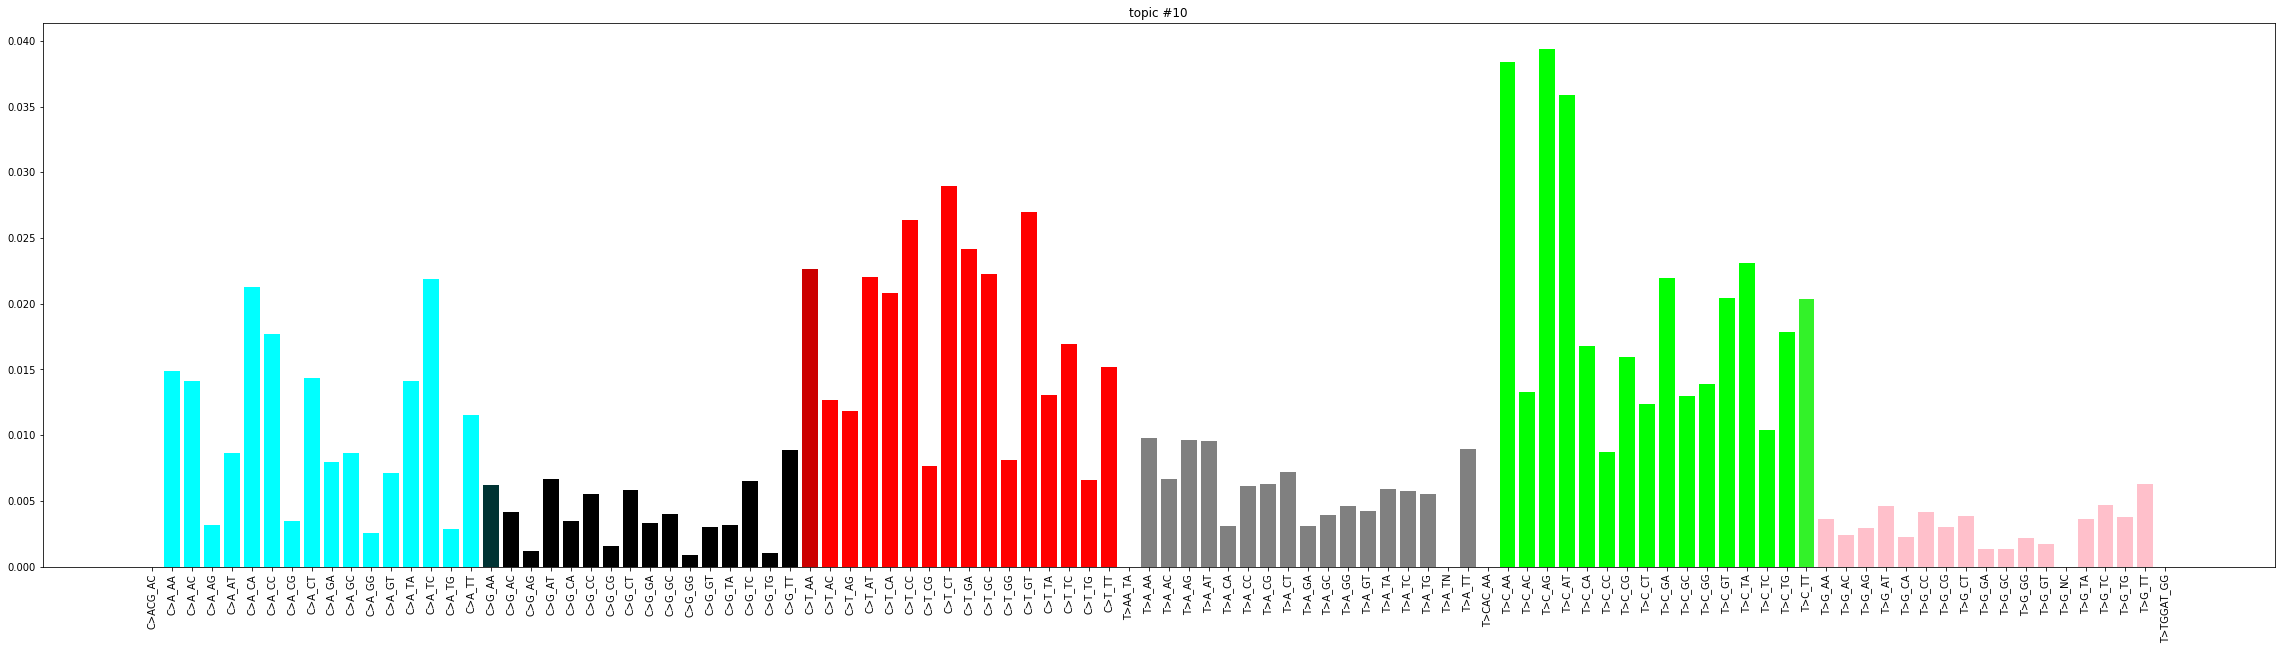

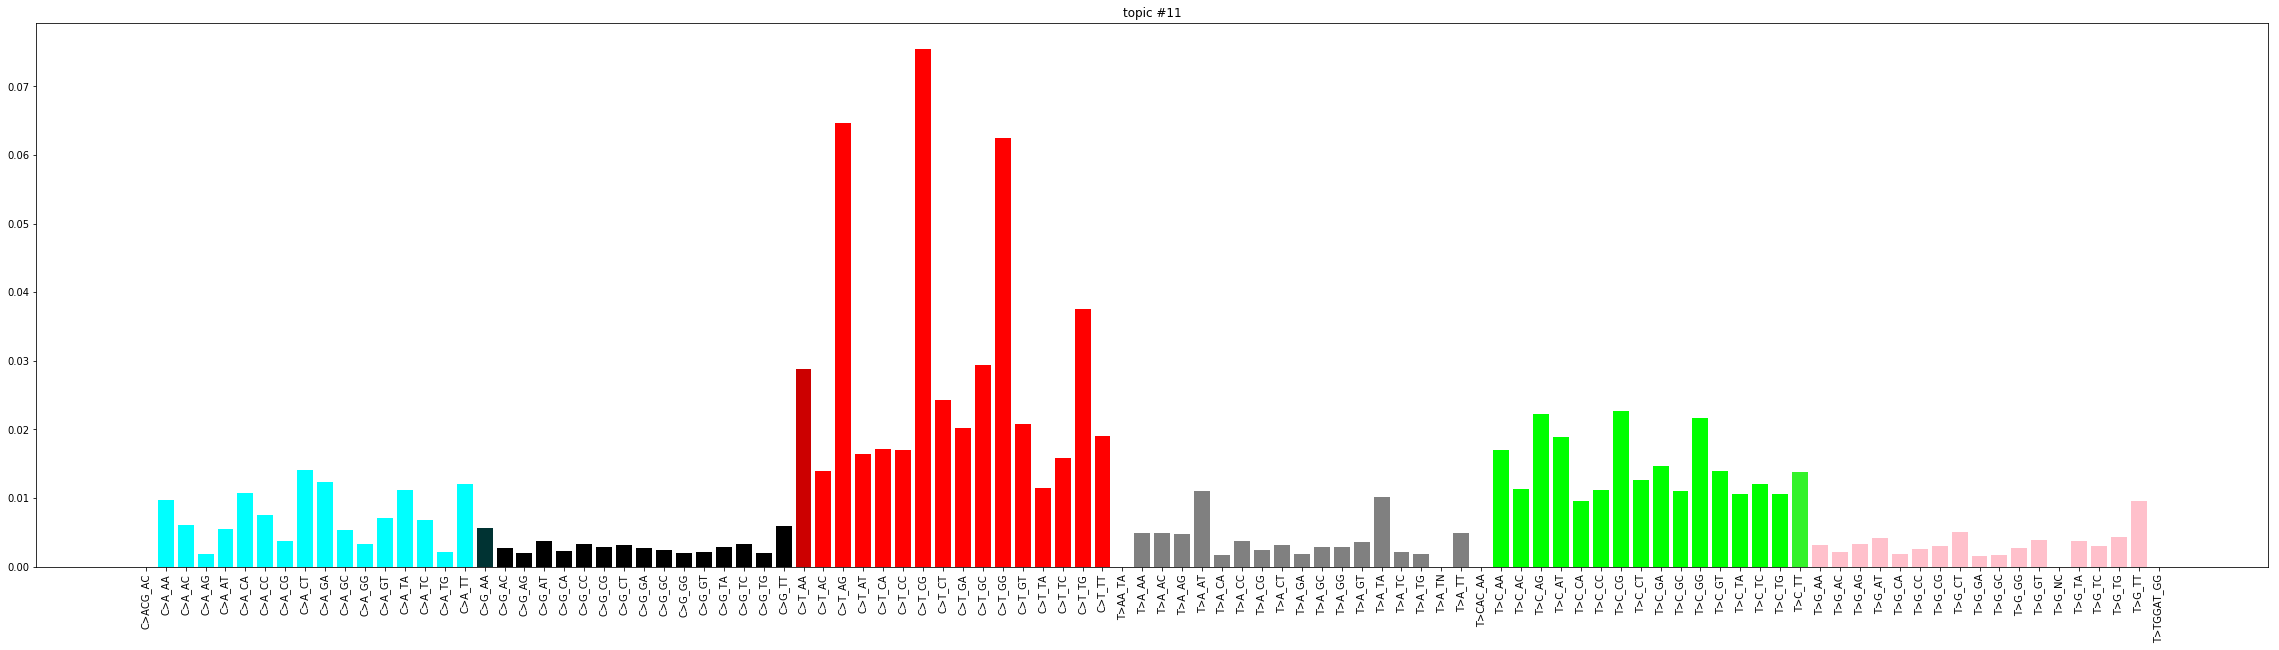

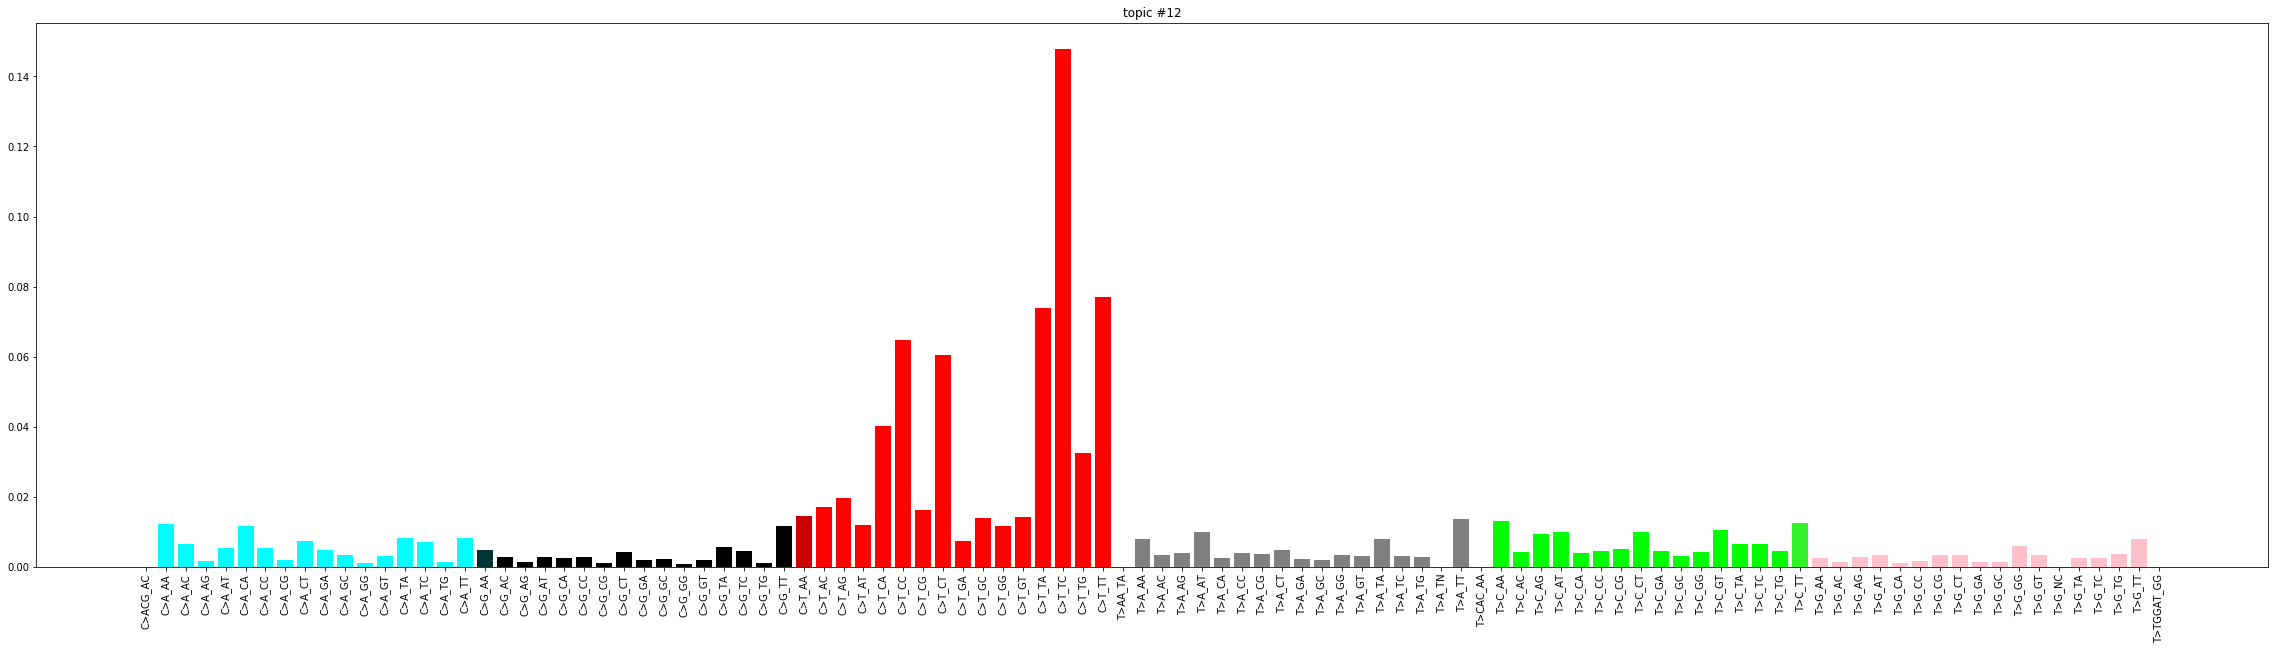

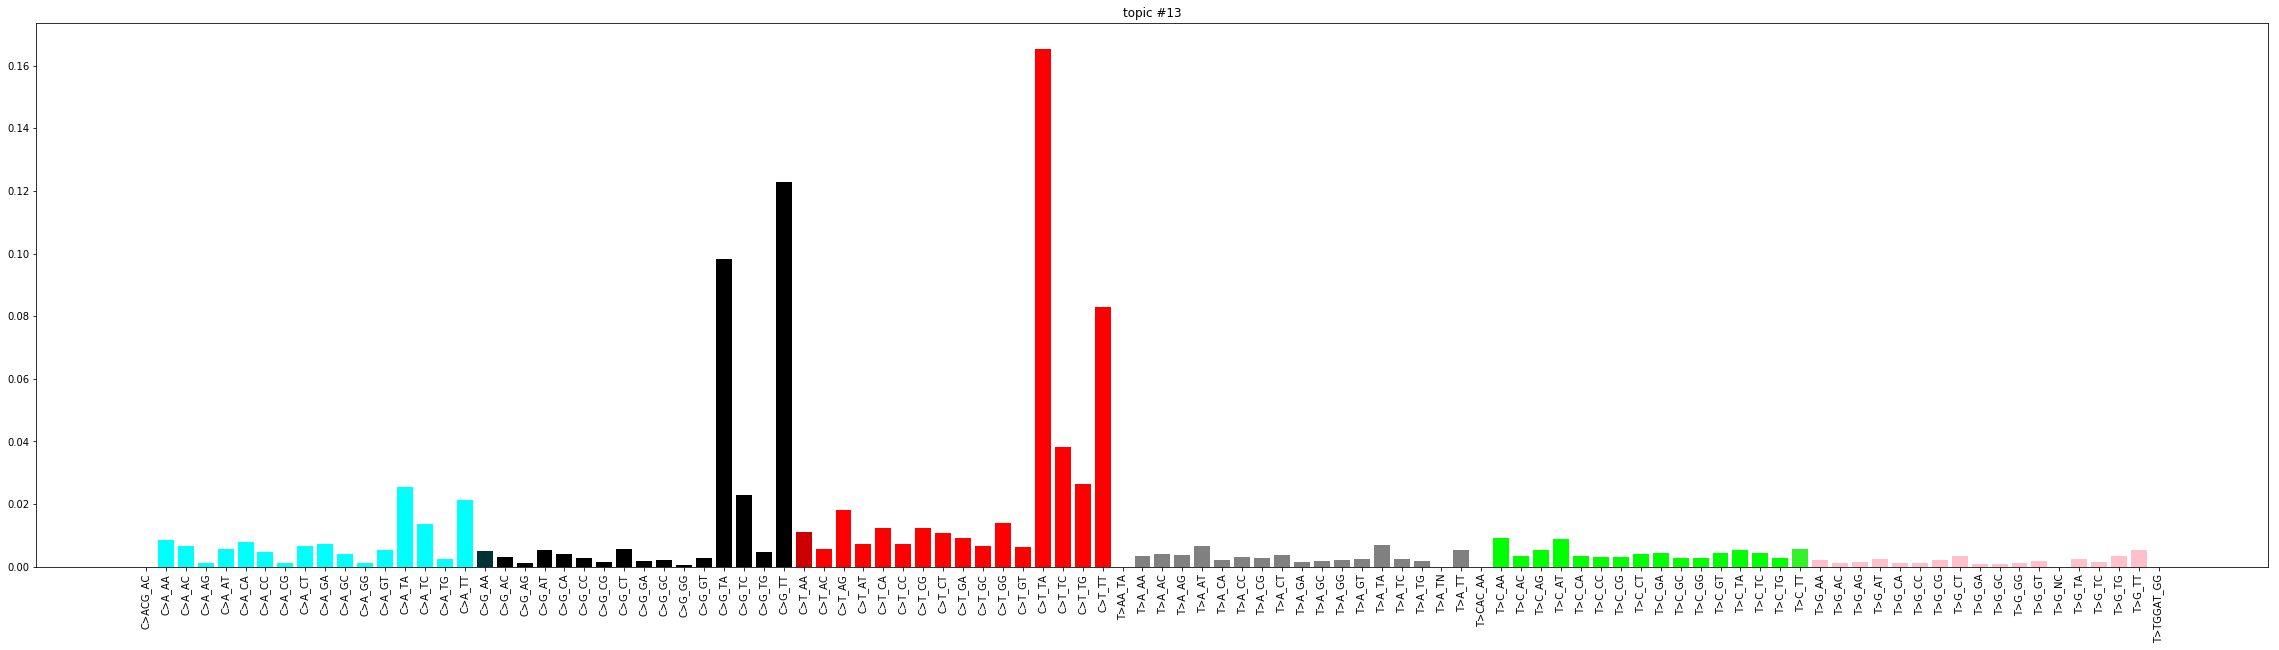

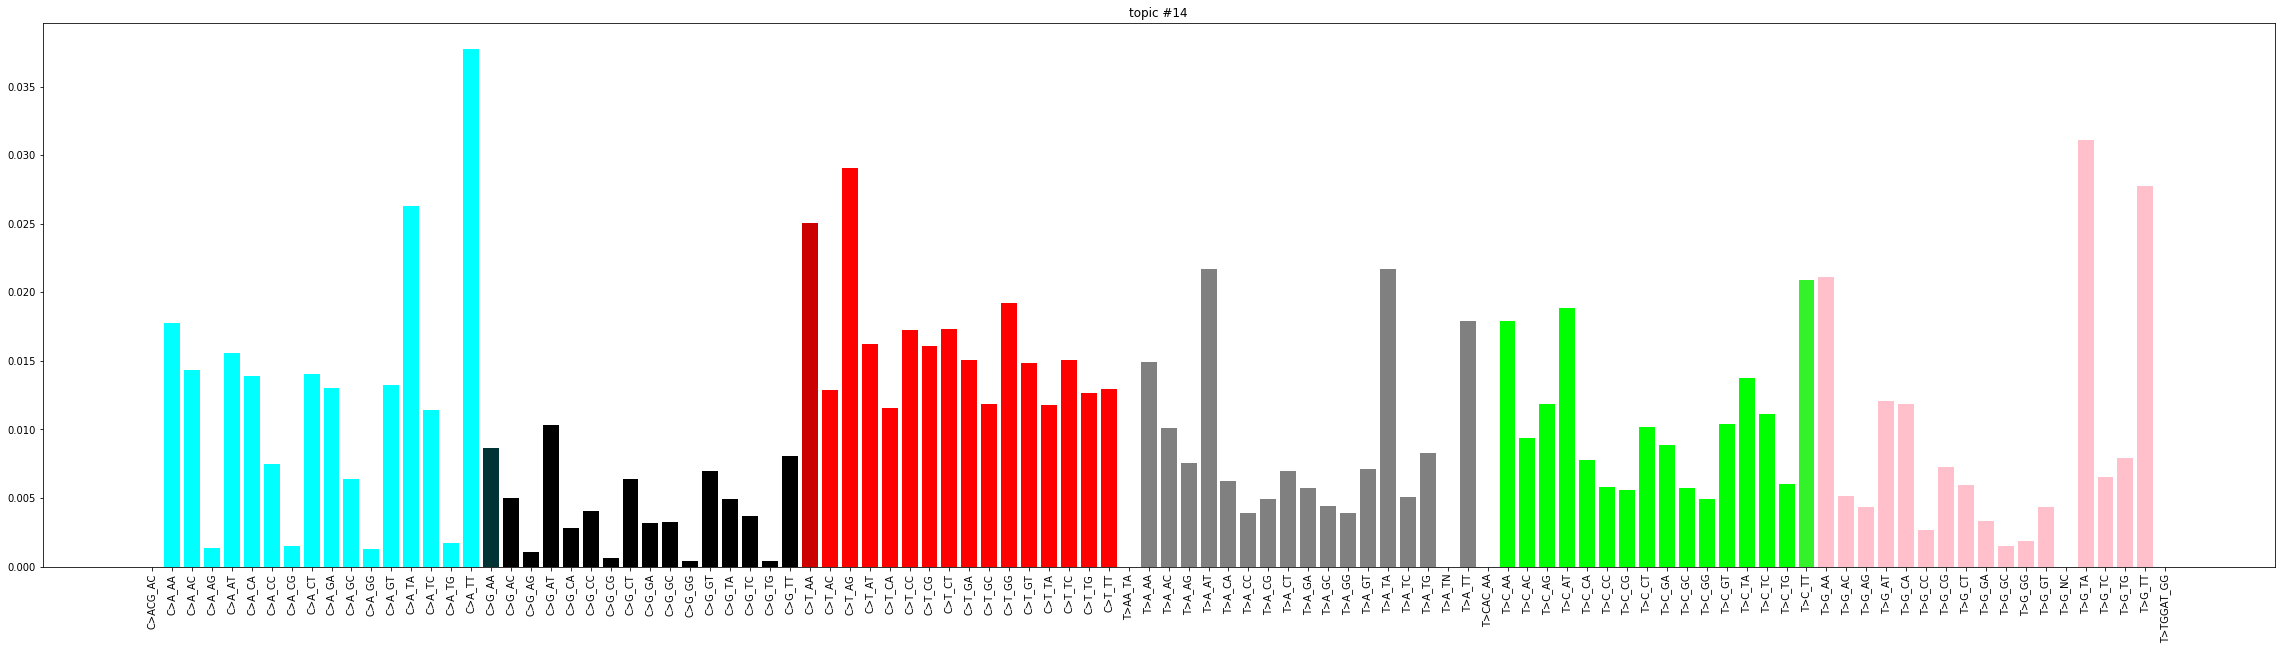

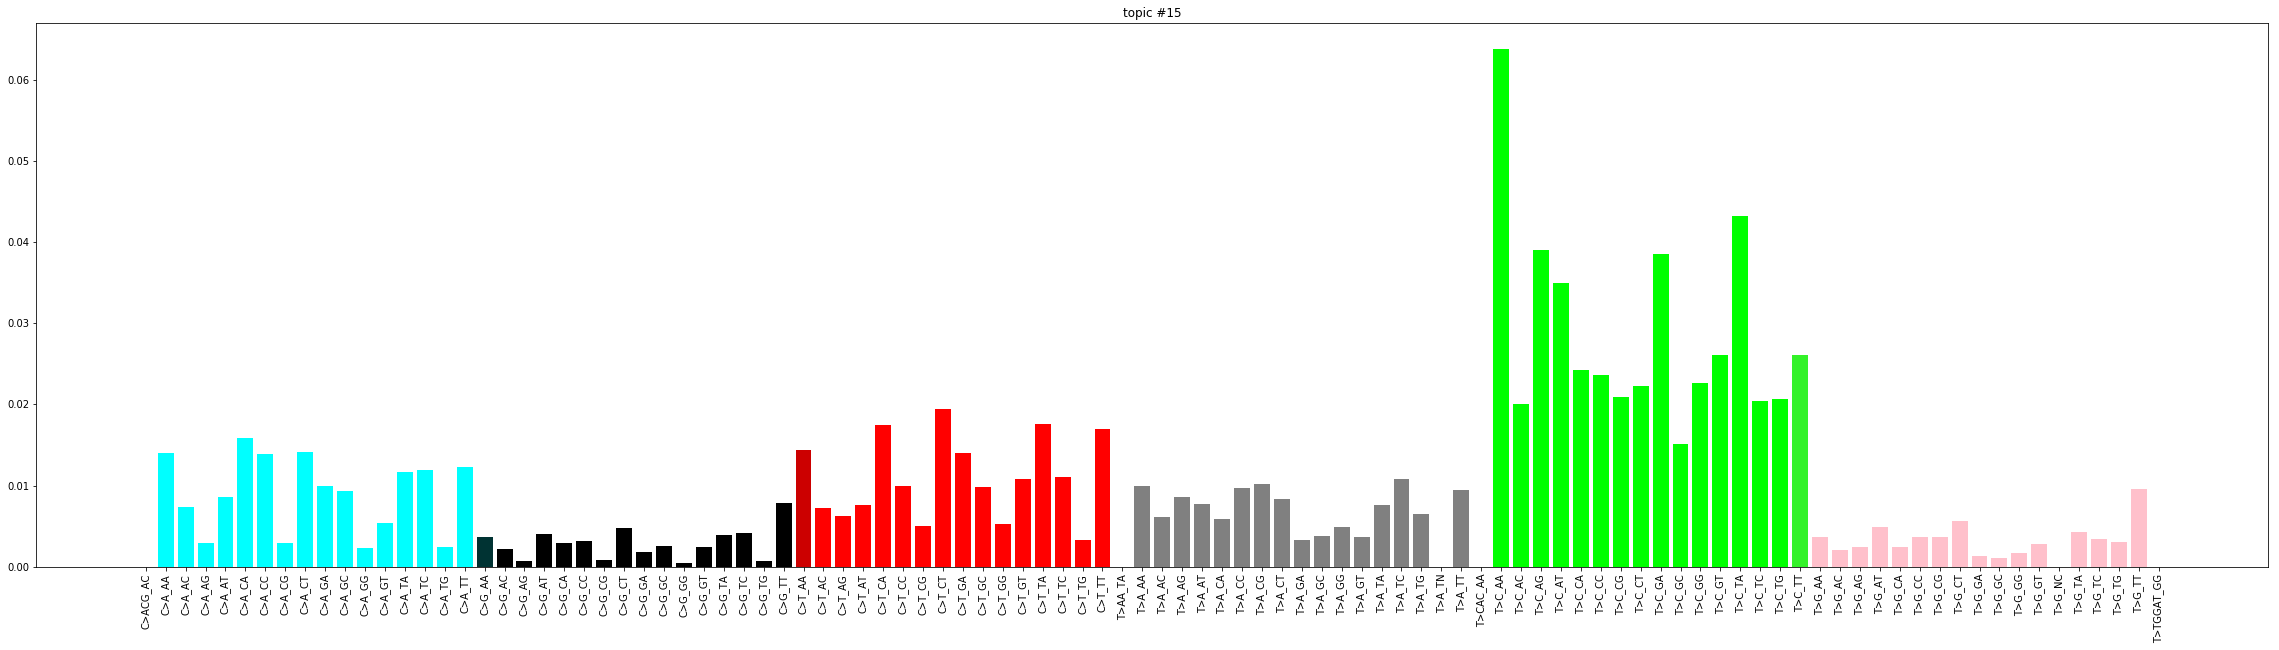

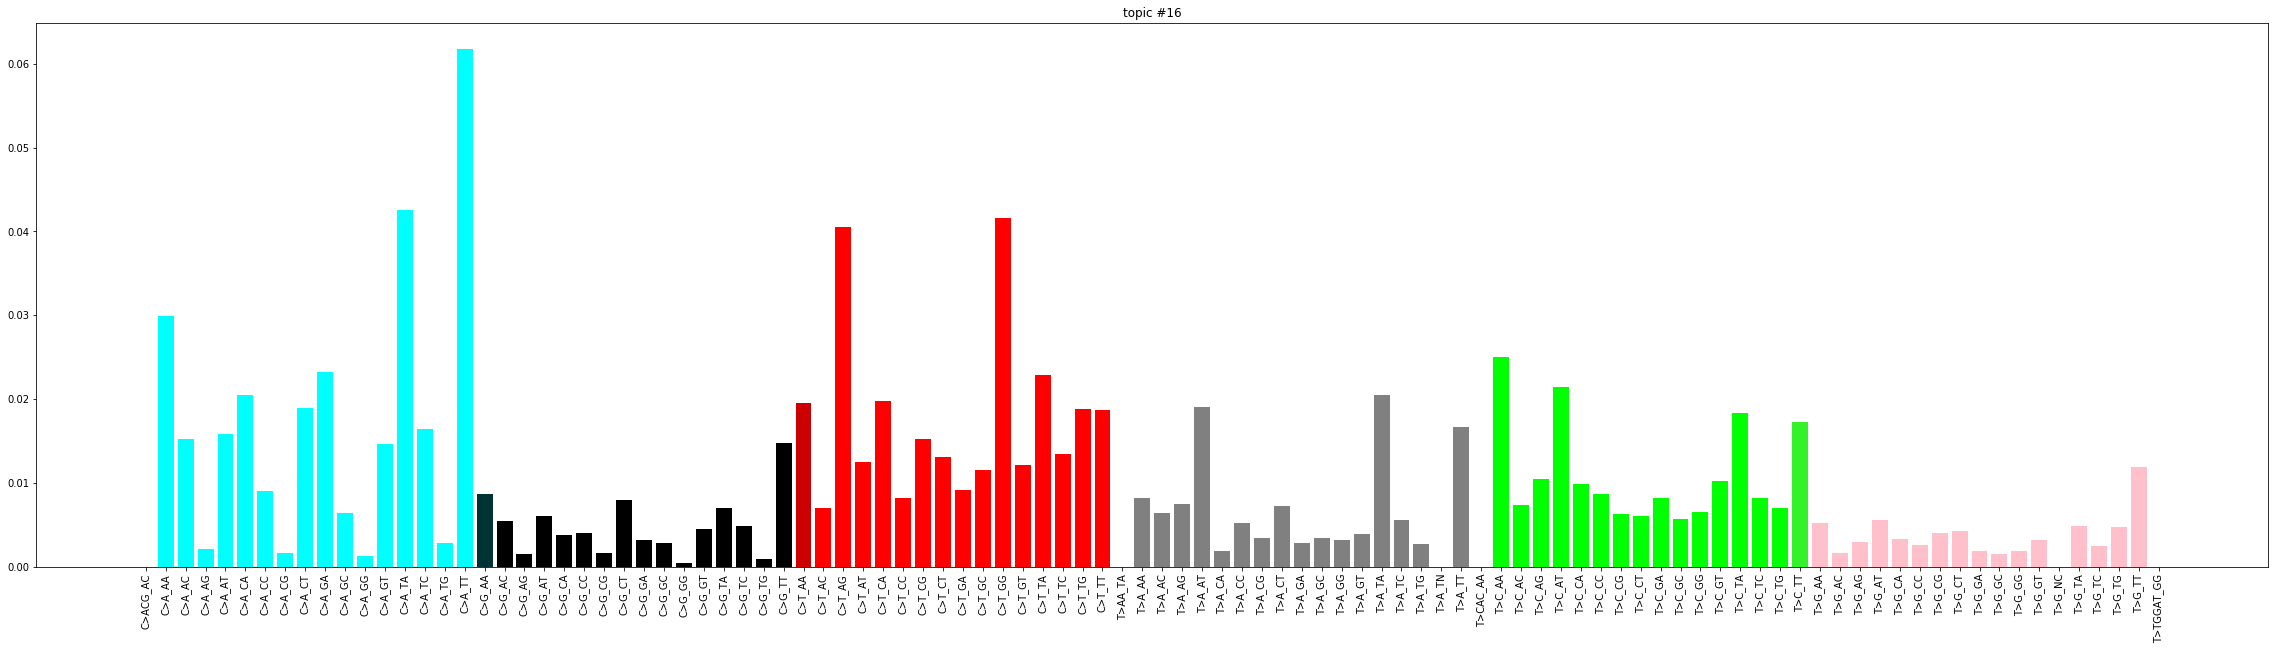

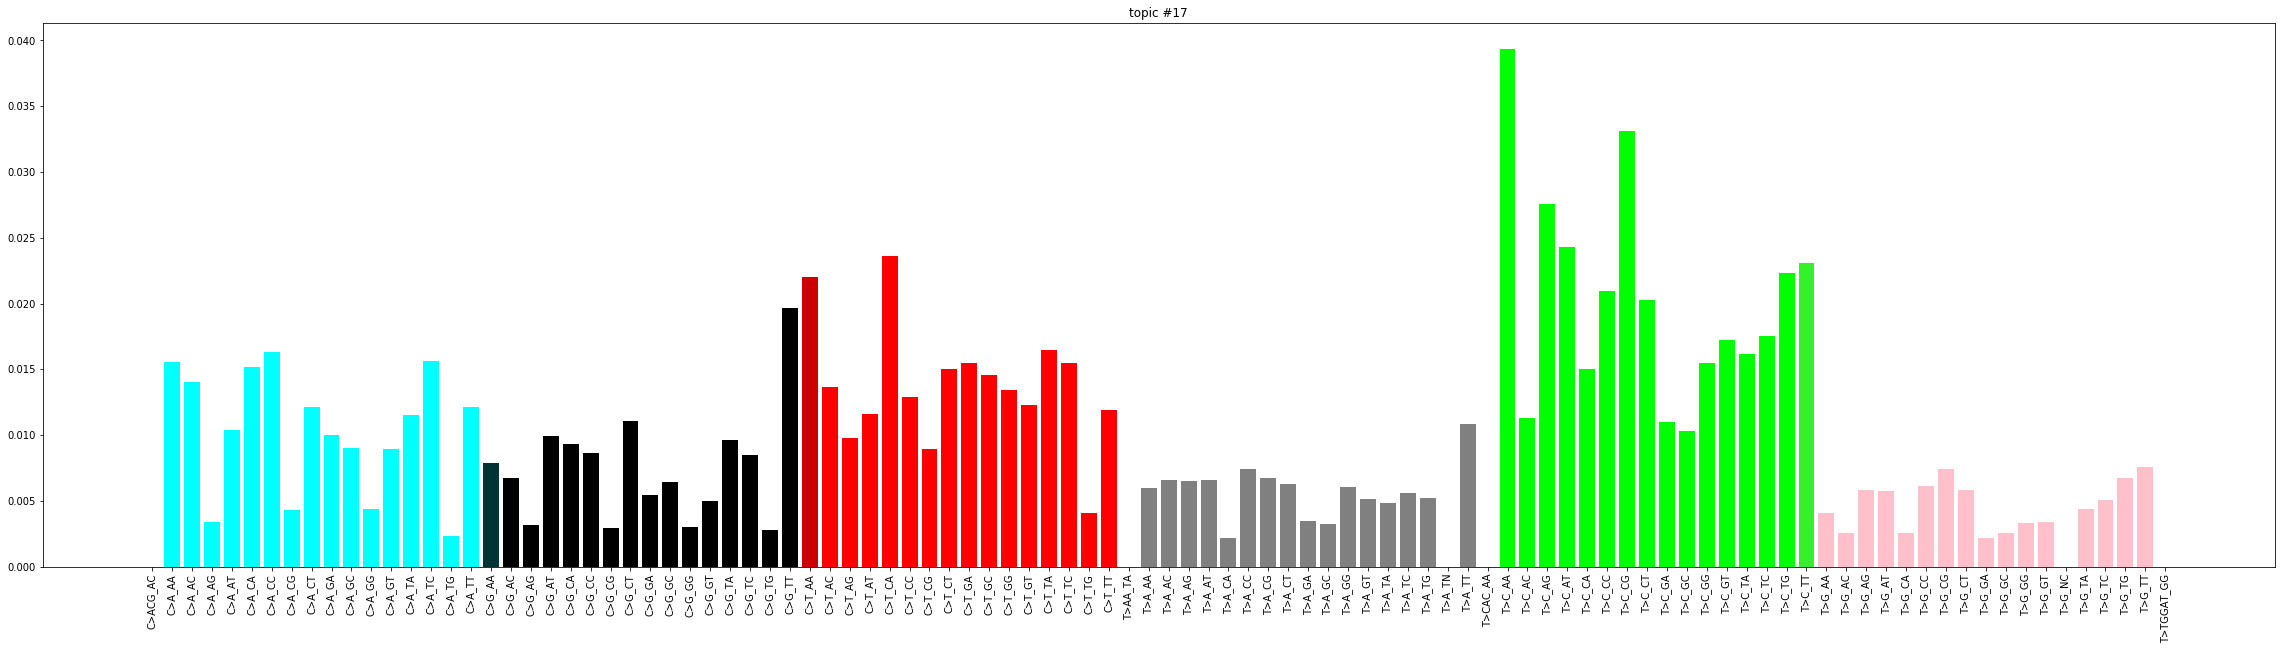

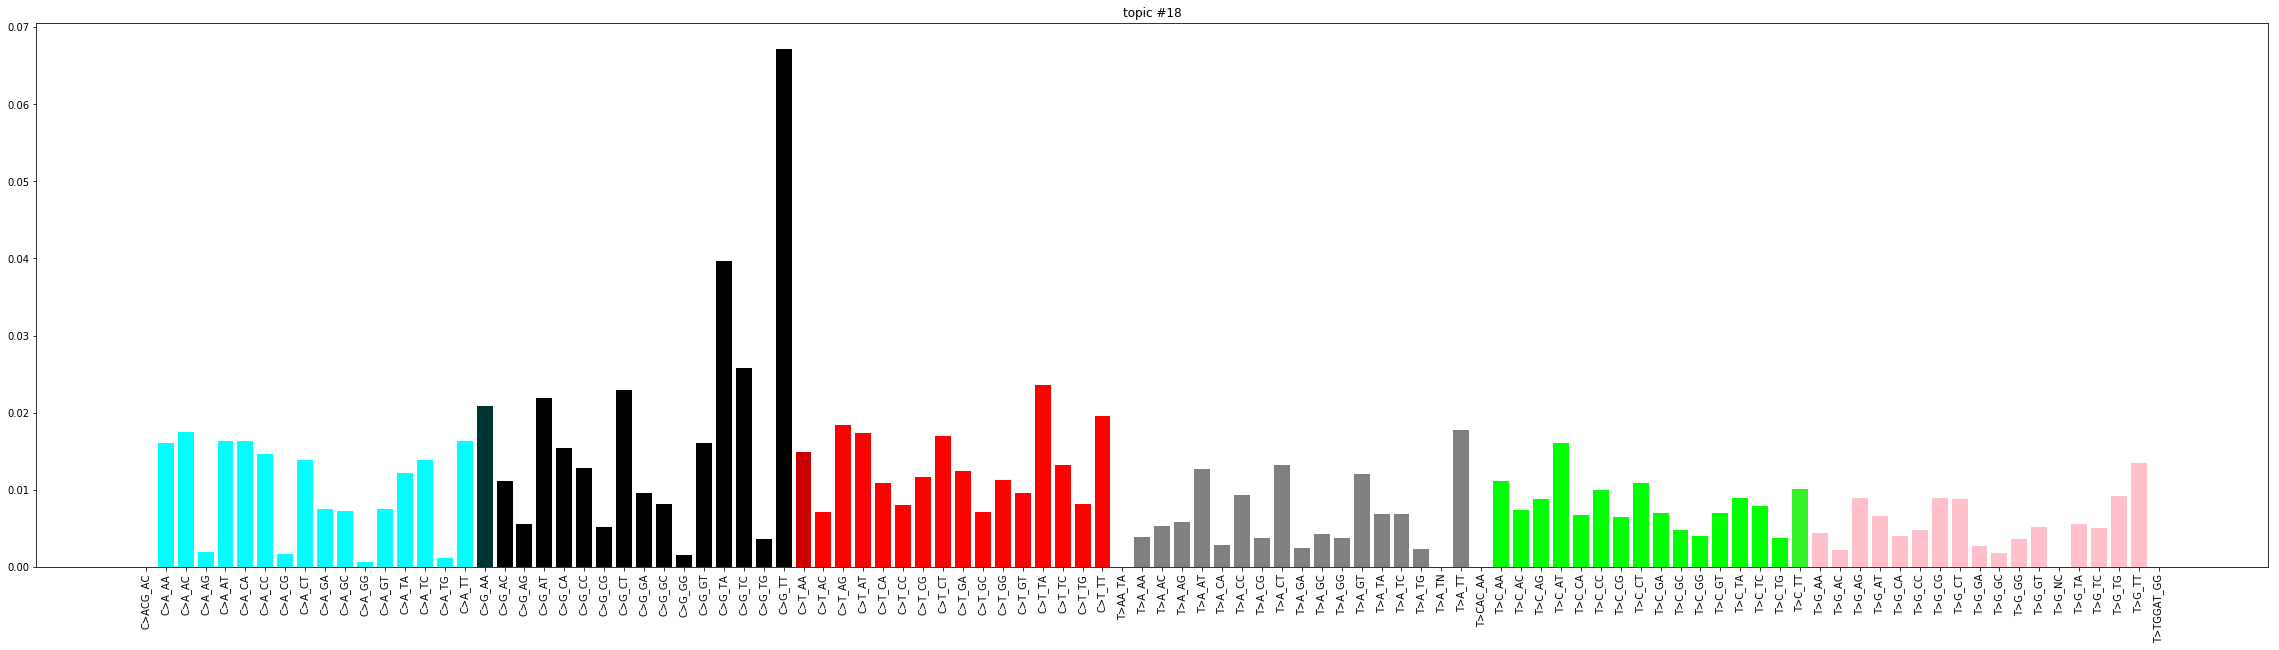

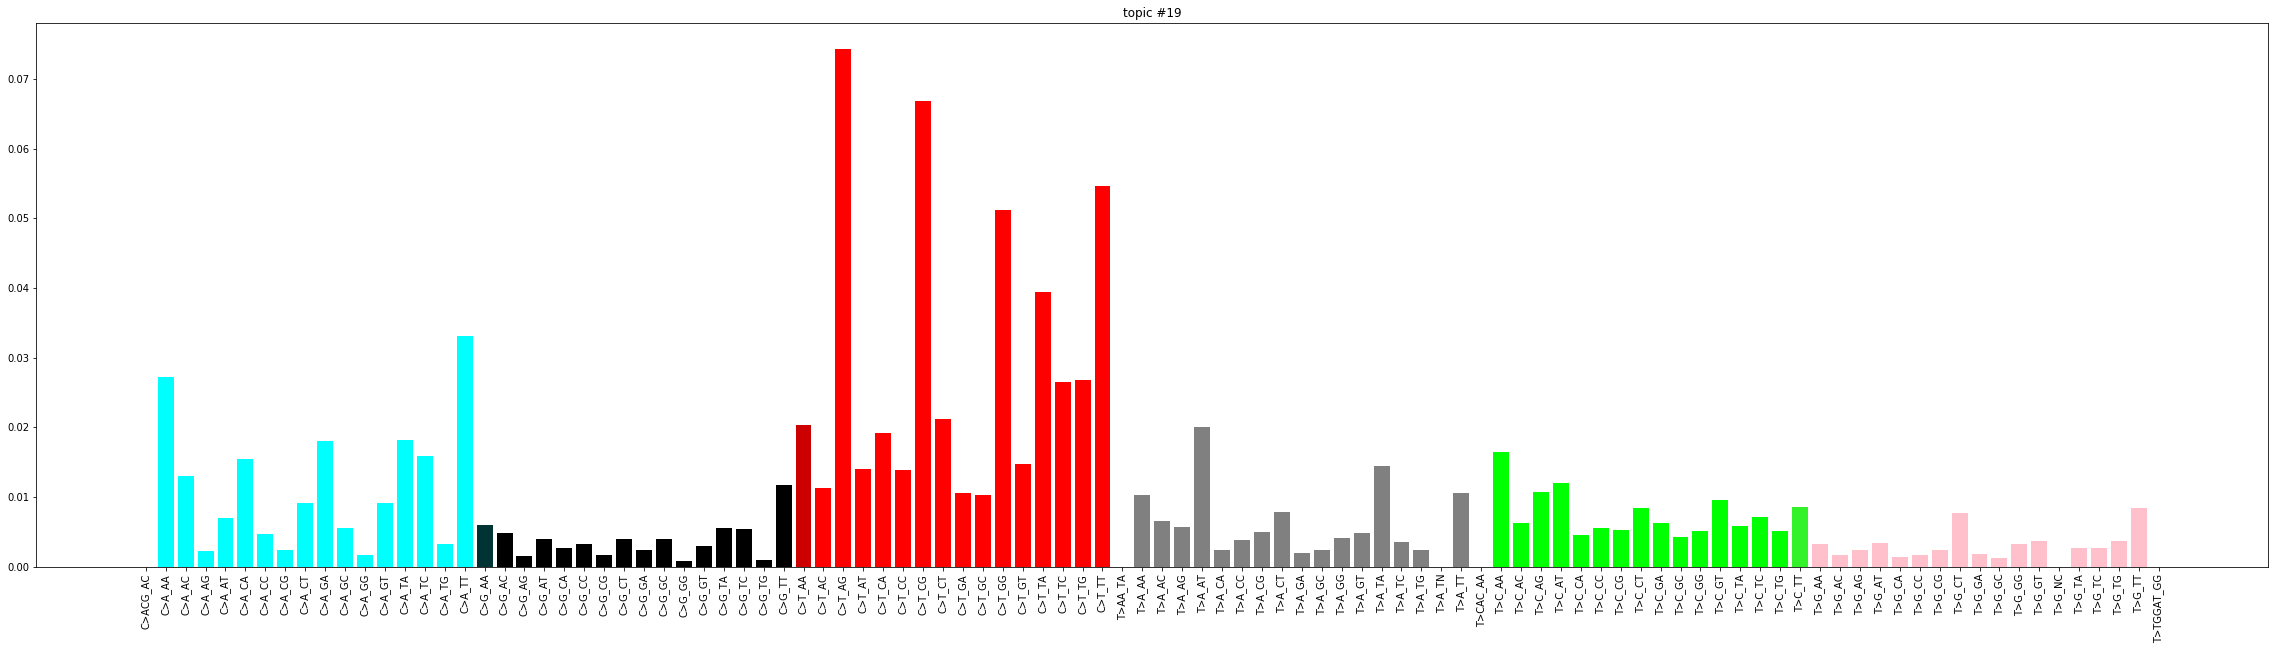

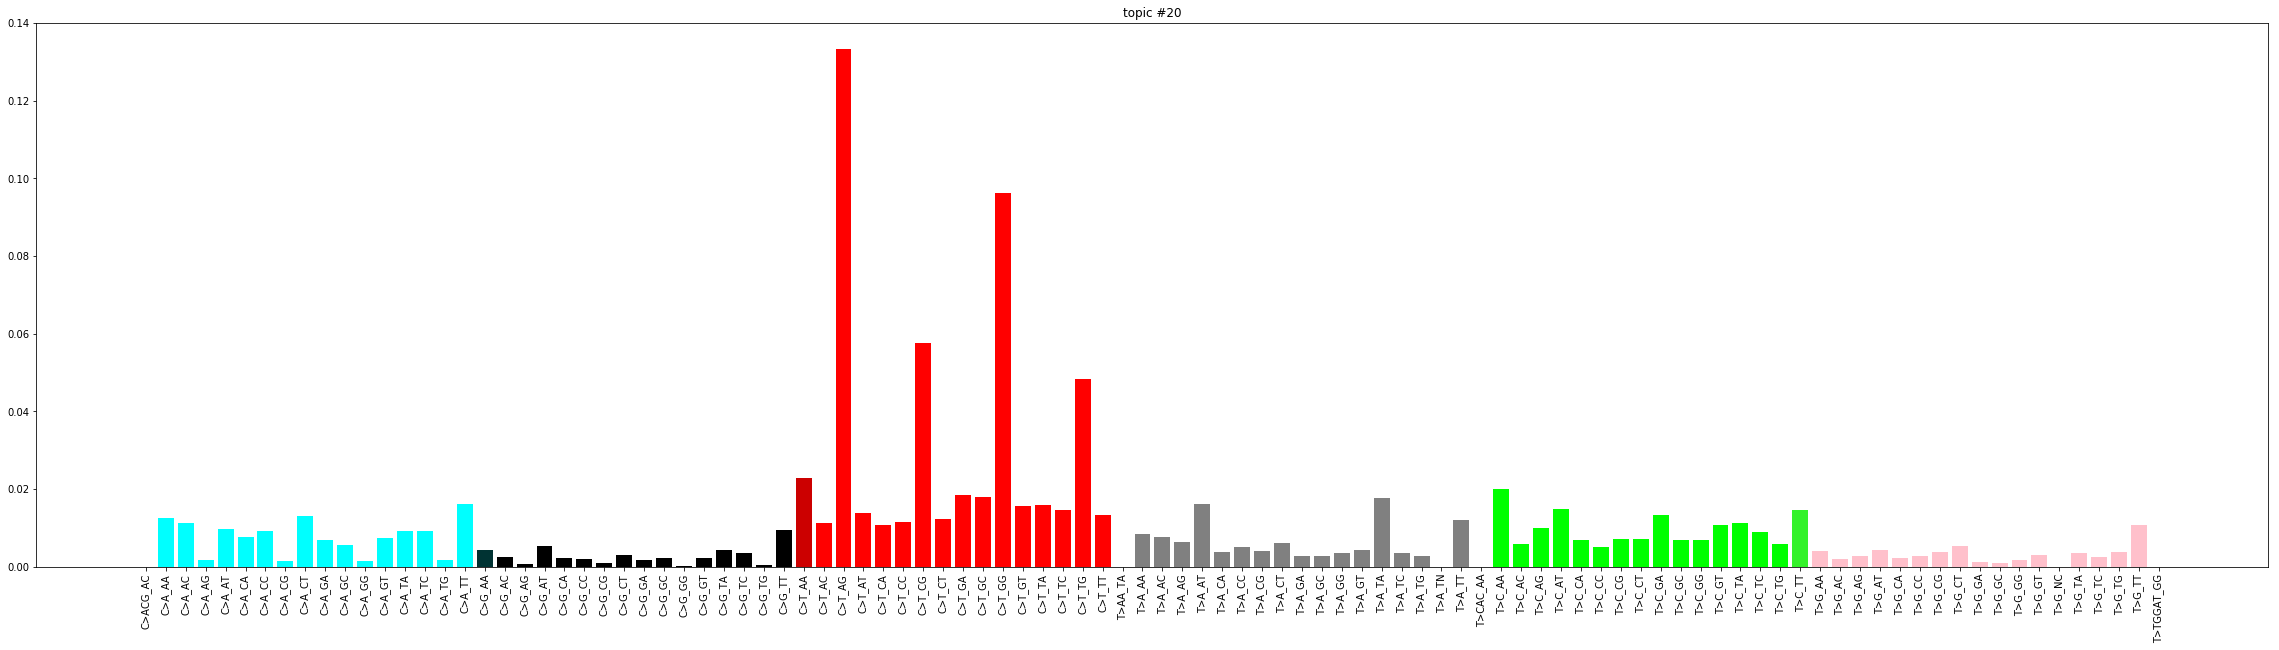

In [166]:
clist=[(0, "aqua"), (16/102, "aqua"),\
       (17/102, "black"),(32/102, "black"),\
       (33/102, "red"),(48/102, "red"),\
       (49/102, "gray"),(66/102, "gray"),\
       (67/102, "lime"),(83/102, "lime"),\
       (84/102, "pink"),(102/102, "pink")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

for i in range(lda.num_topics):
    plt.figure(figsize=(40,10))
    #plt.subplot(lda.num_topics,2,i+1)
    dict_topic=dict(sorted(dict(lda.show_topic(i,102)).items()))
    x=np.array(range(len(dict_topic)))
    plt.title("topic #{}".format(i+1))
    plt.bar(range(len(dict_topic)), dict_topic.values(), align='center',color=rvb(x/102)) 
    plt.xticks(range(len(dict_topic)), list(dict_topic.keys()), rotation=90)  
    plt.savefig('topic_pdf/topicmodel_ms_{}.pdf'.format(i+1))

pdf→png変換

In [ ]:
from pdf2image import convert_from_path
#pathを取得
pdf_path=glob.glob("./ms_cosmic_pdf/*")
pdf_name= [i.strip("./ms_cosmic_pdf/ms") for i in pdf_path]

#sortする
pdf_path.sort()
pdf_name.sort()

#pngに変換
for (pdf,i) in zip(pdf_path,pdf_name):
    image = convert_from_path(pdf)
    image[0].save('ms_cosmic_png/ms{}.png'.format(i), 'png')

In [168]:
from pdf2image import convert_from_path

In [178]:
pdf_path=glob.glob("./ms_cosmic_pdf/*")

In [180]:
len(pdf_path)

67

In [184]:
pdf_name= [i.strip("./ms_cosmic_pdf/ms") for i in pdf_path]

In [187]:
pdf_name.sort()

In [193]:
#pdf_name

In [190]:
pdf_name.remove('7')

In [191]:
pdf_name.remove('7')

In [194]:
pdf_name.append('7c')

In [195]:
pdf_name.append('7d')

In [197]:
pdf_name.sort()

In [199]:
#pdf_name

In [204]:
pdf_path.sort()

In [206]:
#pdf_path

In [209]:
for (pdf,i) in zip(pdf_path,pdf_name):
    image = convert_from_path(pdf)
    image[0].save('ms_cosmic_png/ms{}.png'.format(i), 'png')

作ったtopic_pdfもpngに変換

In [216]:
topic_pdf_path=glob.glob("./topic_pdf/*")

In [217]:
topic_pdf_path.sort()

In [218]:
topic_pdf_path

['./topic_pdf/topicmodel_ms_1.pdf',
 './topic_pdf/topicmodel_ms_10.pdf',
 './topic_pdf/topicmodel_ms_11.pdf',
 './topic_pdf/topicmodel_ms_12.pdf',
 './topic_pdf/topicmodel_ms_13.pdf',
 './topic_pdf/topicmodel_ms_14.pdf',
 './topic_pdf/topicmodel_ms_15.pdf',
 './topic_pdf/topicmodel_ms_16.pdf',
 './topic_pdf/topicmodel_ms_17.pdf',
 './topic_pdf/topicmodel_ms_18.pdf',
 './topic_pdf/topicmodel_ms_19.pdf',
 './topic_pdf/topicmodel_ms_2.pdf',
 './topic_pdf/topicmodel_ms_20.pdf',
 './topic_pdf/topicmodel_ms_3.pdf',
 './topic_pdf/topicmodel_ms_4.pdf',
 './topic_pdf/topicmodel_ms_5.pdf',
 './topic_pdf/topicmodel_ms_6.pdf',
 './topic_pdf/topicmodel_ms_7.pdf',
 './topic_pdf/topicmodel_ms_8.pdf',
 './topic_pdf/topicmodel_ms_9.pdf']

In [219]:
topic_pdf_name= [i.strip("./topic_pdf/topicmodel_ms_") for i in topic_pdf_path]

In [220]:
topic_pdf_name

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [221]:
for (pdf,i) in zip(topic_pdf_path,topic_pdf_name):
    image = convert_from_path(pdf)
    image[0].save('topic_png/ms{}.png'.format(i), 'png')

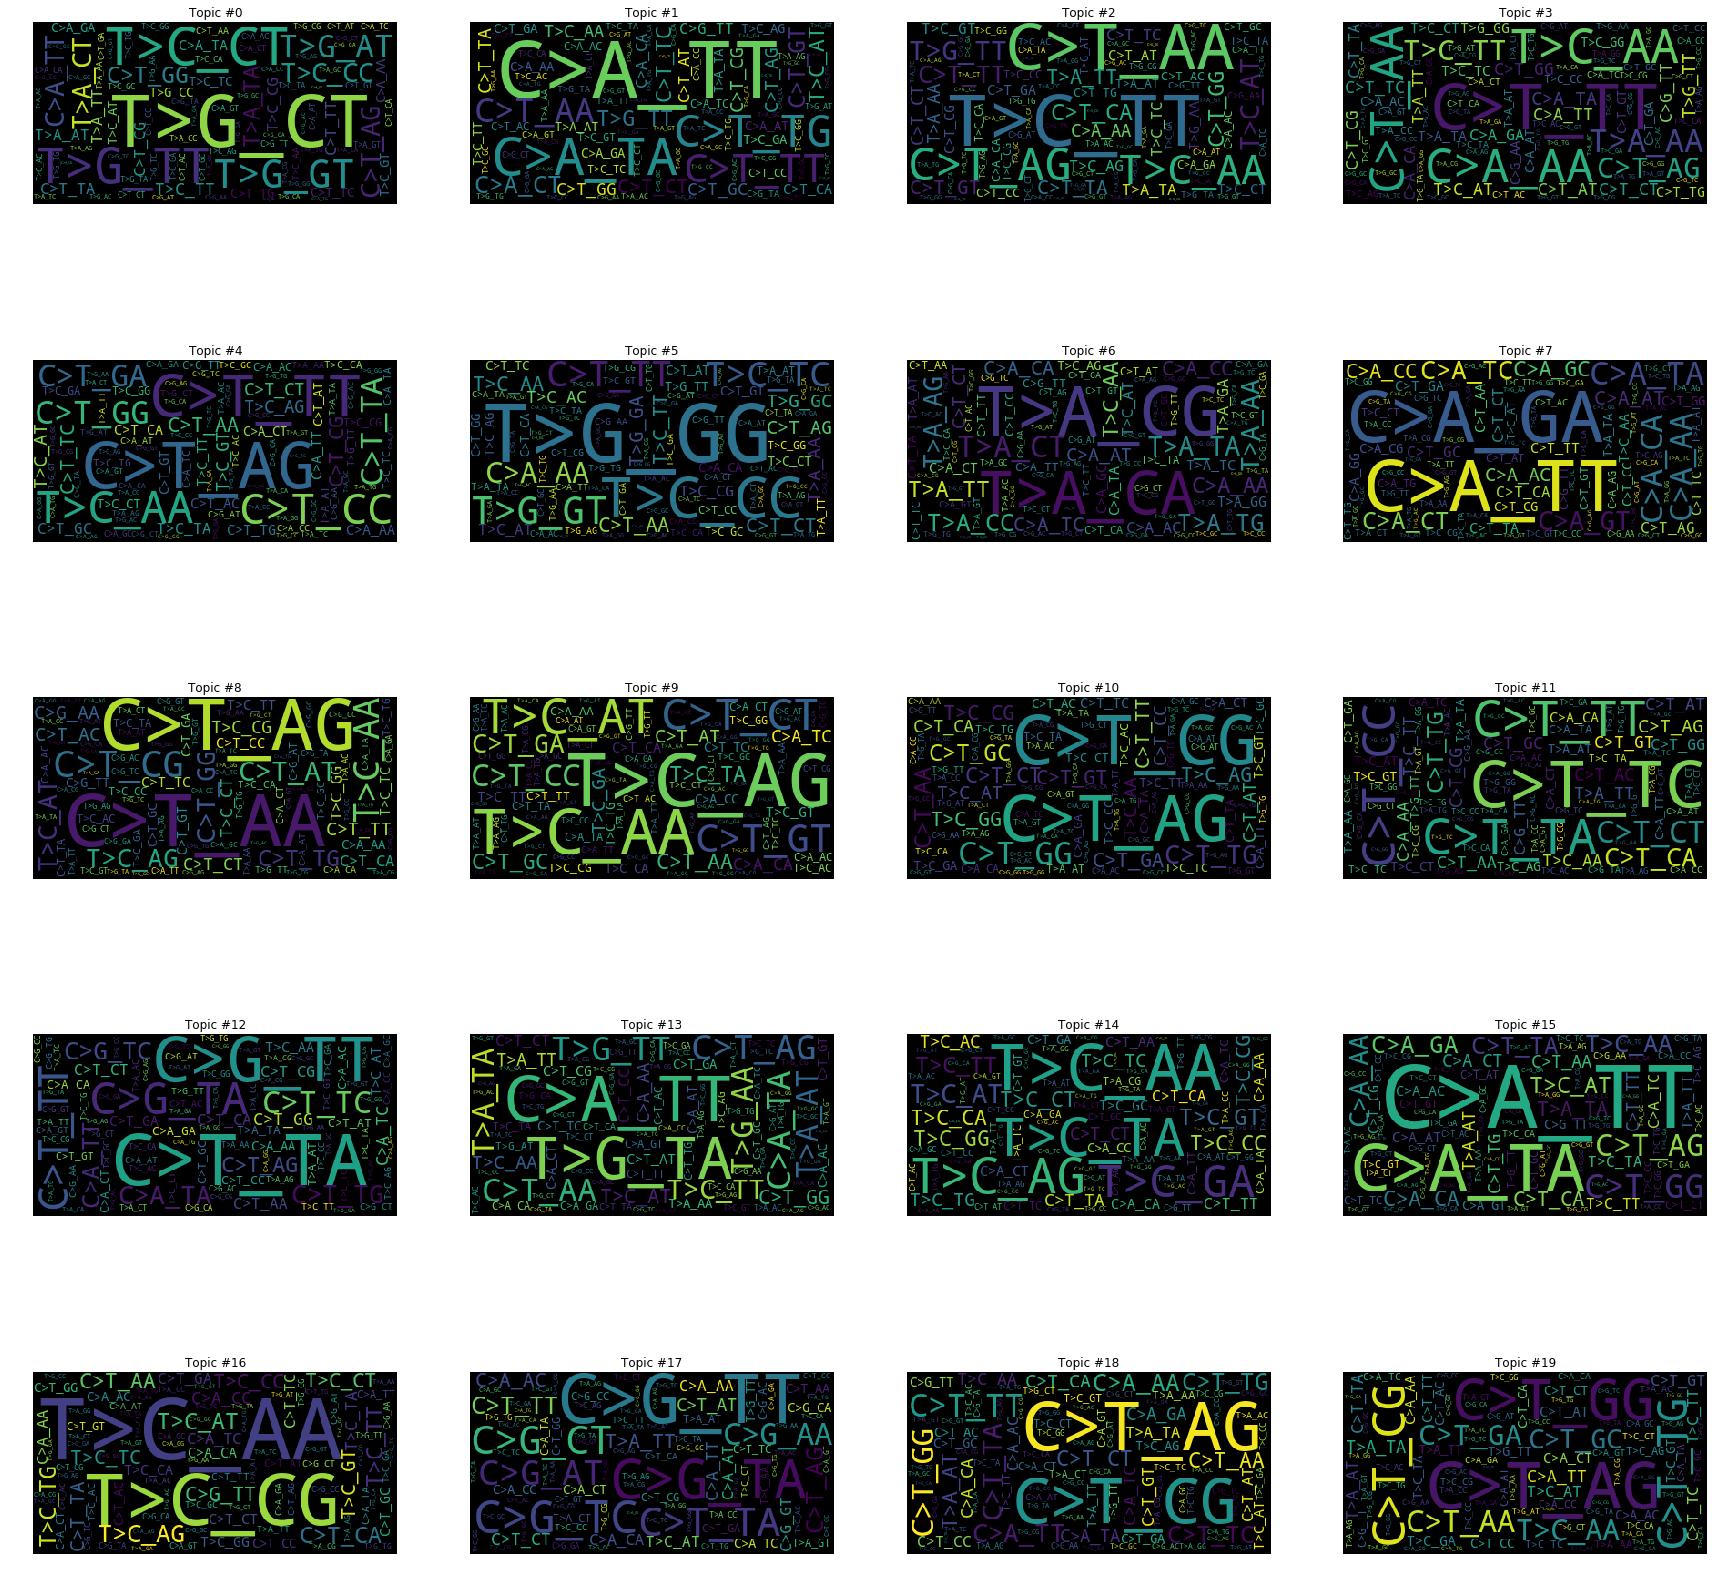

In [61]:
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = WordCloud().generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))